In [34]:
from IPython.display import YouTubeVideo
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",1000)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [37]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

In [38]:
page=requests.get("https://www.zingat.com/kocaeli-satilik-konut",headers=headers)

b'\n    <!DOCTYPE html>\n<html lang="tr">\n<head>\n<script src="/cdn-cgi/apps/head/x1Xp7i1b0NfjYso73lc3_rljQ7Y.js"></script><script type="b4131e11589f690036a5f574-text/javascript">window.isMobile = /Mobile|iP(hone|od|ad)|Android|BlackBerry|IEMobile/.test(navigator.userAgent);\n  window.matchMobile = window.matchMedia(\'(max-width: 991px)\').matches;\n  window.tablet = window.matchMedia(\'(min-width:992px) and (max-width: 1200px)\').matches;\n\n</script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1.0, user-scalable=no" />\n<meta name="format-detection" content="telephone=no">\n<link rel="canonical" href="https://www.zingat.com/kocaeli-satilik-konut">\n<meta name="referrer" content="no-referrer-when-downgrade">\n<meta name="facebook-domain-verification" content="knl5mzi7n3xgz1a271qsq7ut2upmno" /><title>Kocaeli Sat\xc4\xb1l\xc4\xb1k Konut Fiyatlar\xc4\xb1 ve \
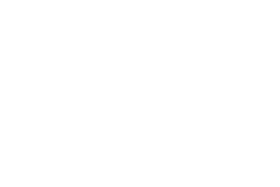
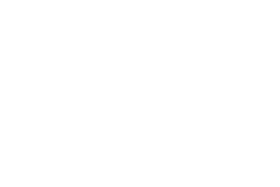
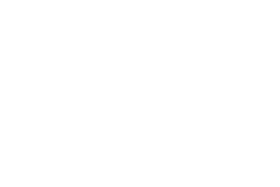
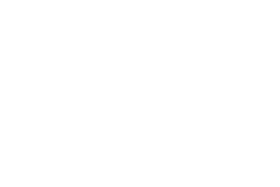
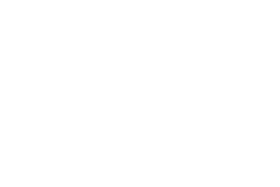
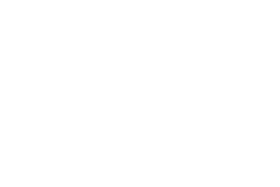
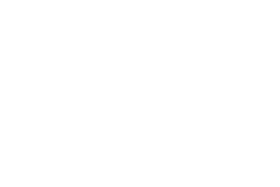
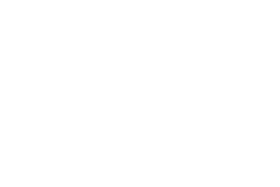
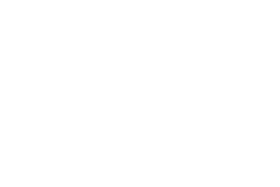
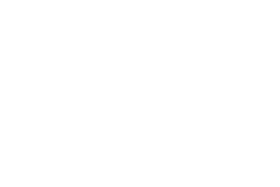
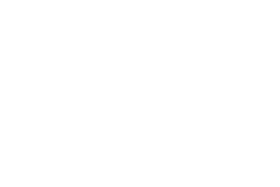
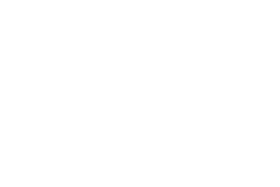
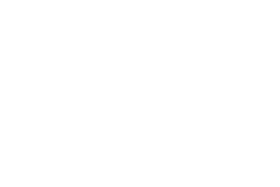
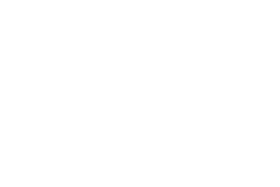
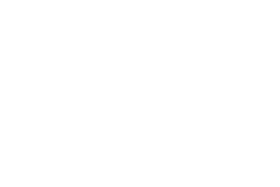
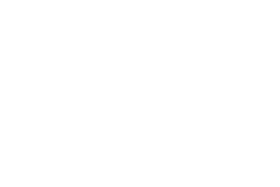
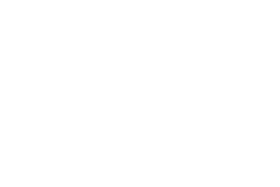
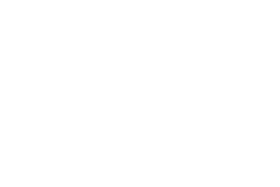
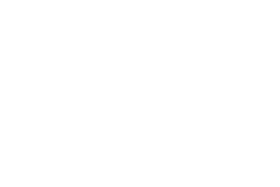
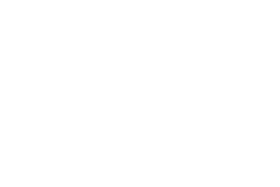
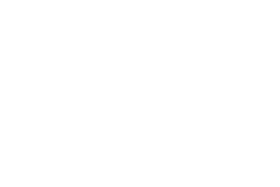
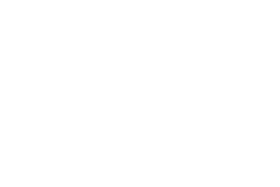
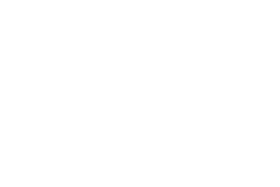
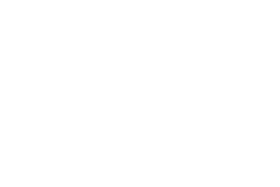
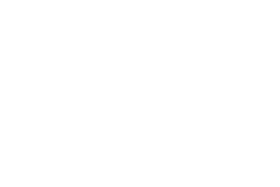
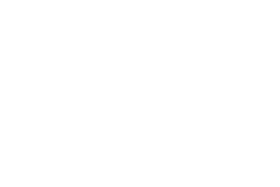
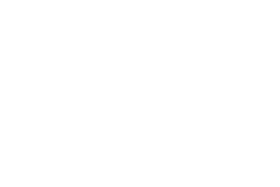
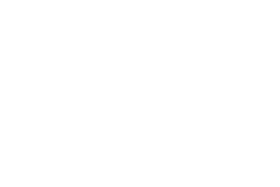
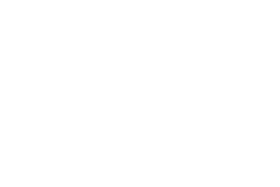
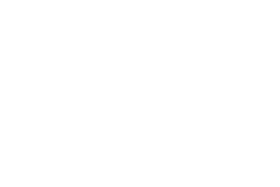
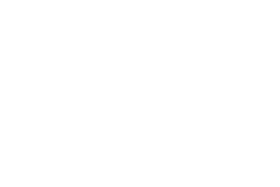
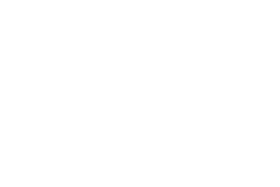
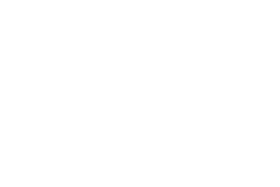
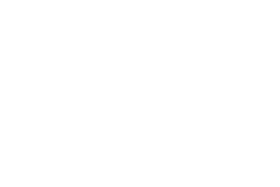
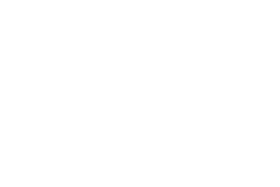
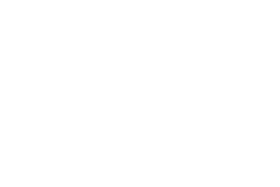
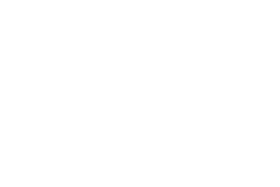
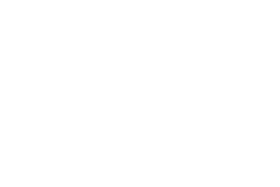
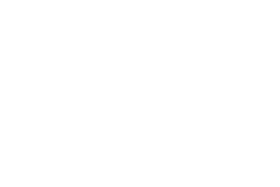
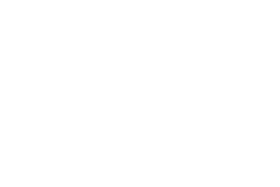
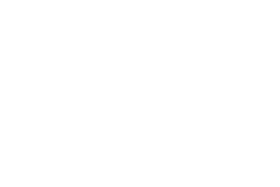
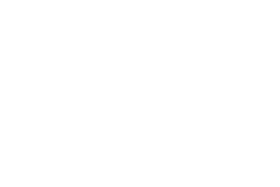
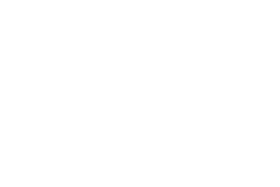
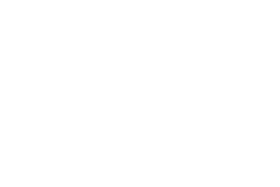
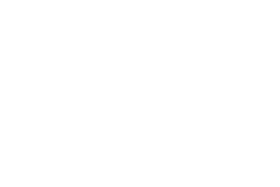
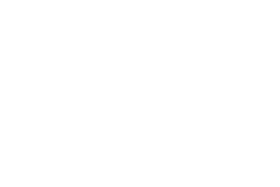
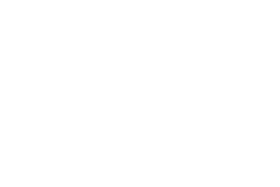
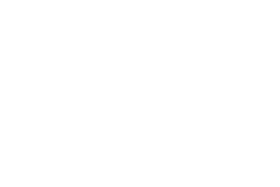
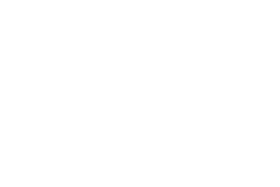
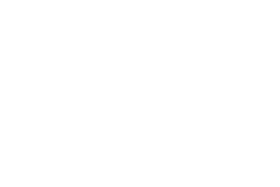
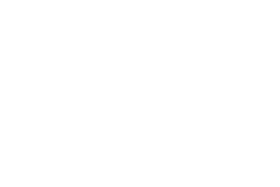
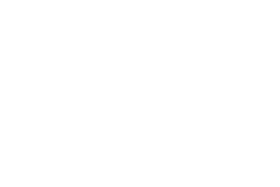
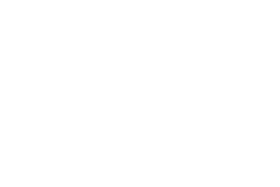
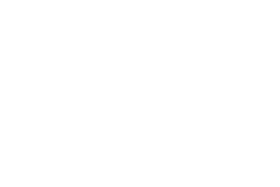
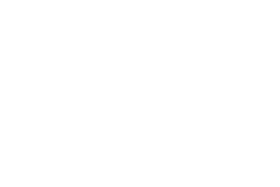
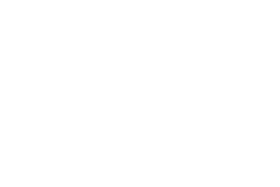
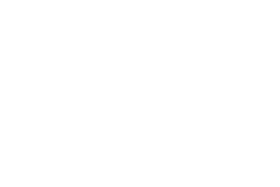
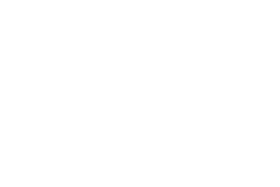
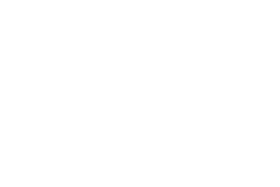
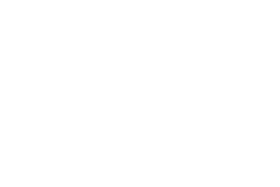
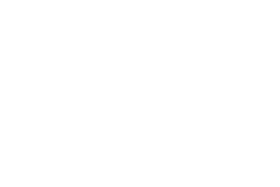
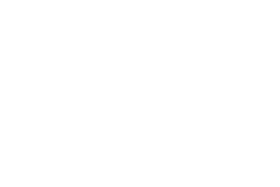
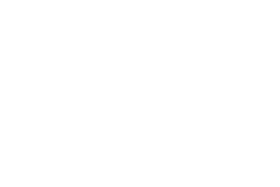
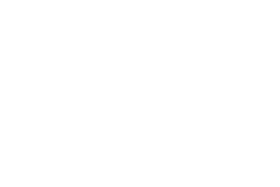
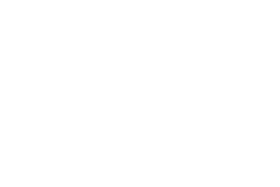
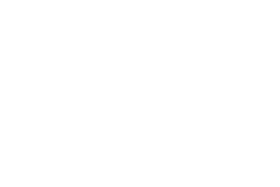
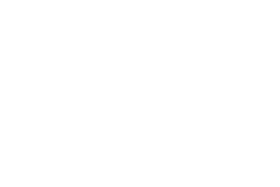
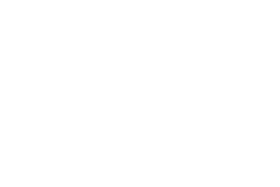
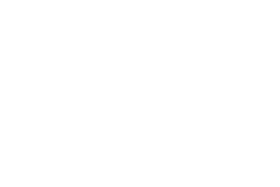
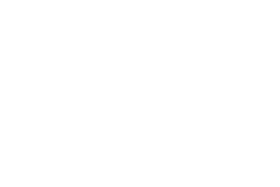
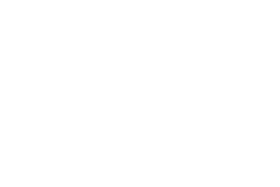
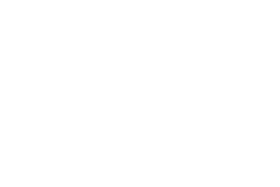
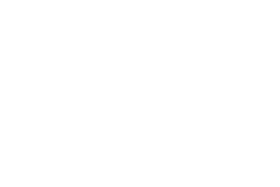
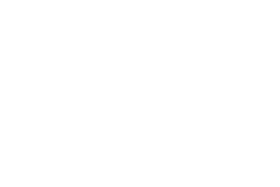
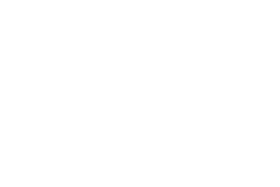
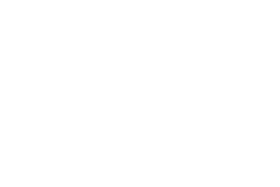
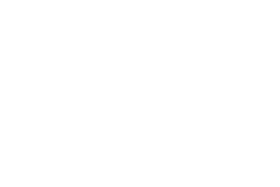
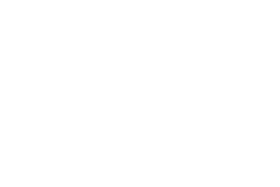
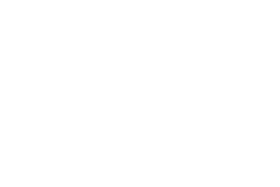
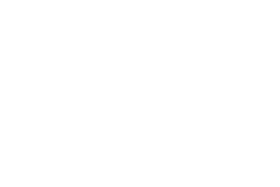
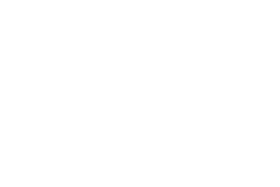
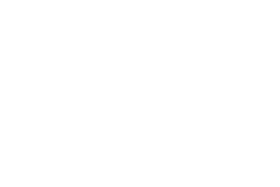
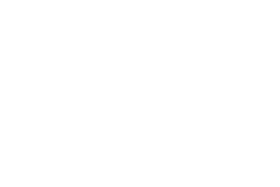
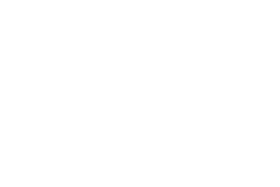
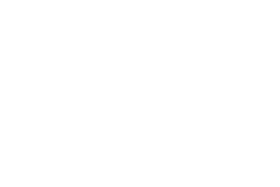
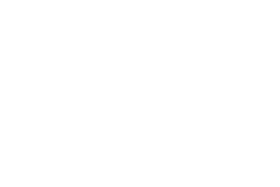
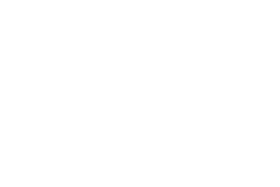
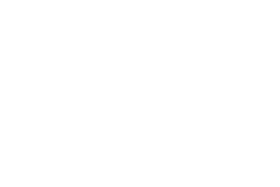
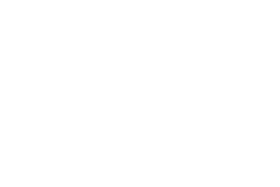
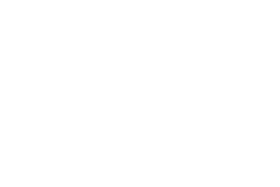
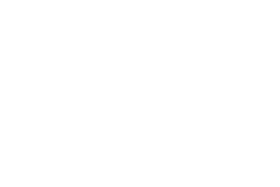
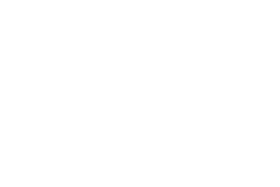
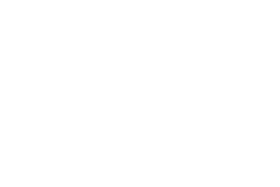
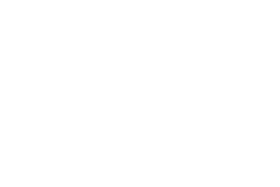
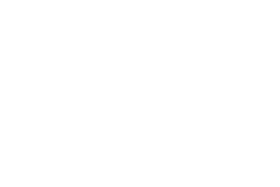
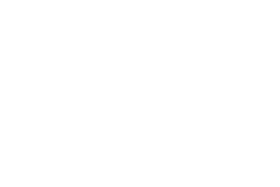
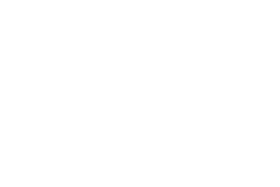
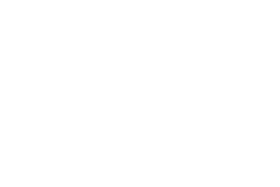
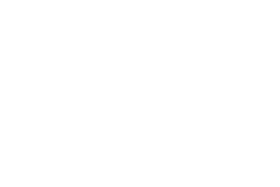
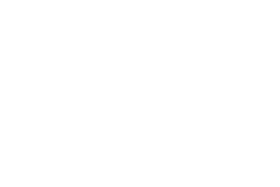
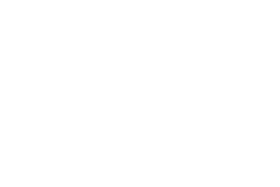
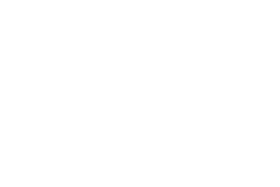
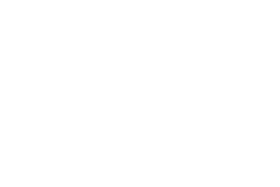
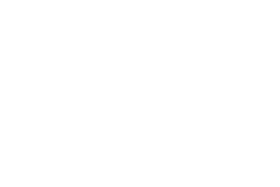
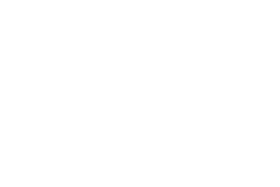
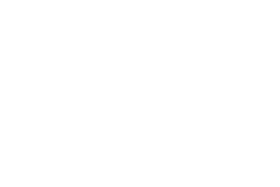
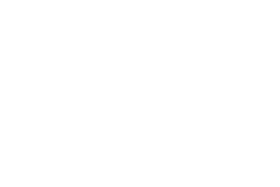

In [39]:
page.content

In [40]:
soup=BeautifulSoup(page.content,"html.parser")

In [41]:
soup=BeautifulSoup(page.content,"html.parser")
#şimdi bu sayfadan tek tek evlere gdip ordaki verileri alacağız:

<bound method Tag.prettify of 
<!DOCTYPE html>

<html lang="tr">
<head>
<script src="/cdn-cgi/apps/head/x1Xp7i1b0NfjYso73lc3_rljQ7Y.js"></script><script type="b4131e11589f690036a5f574-text/javascript">window.isMobile = /Mobile|iP(hone|od|ad)|Android|BlackBerry|IEMobile/.test(navigator.userAgent);
  window.matchMobile = window.matchMedia('(max-width: 991px)').matches;
  window.tablet = window.matchMedia('(min-width:992px) and (max-width: 1200px)').matches;

</script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport">
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.zingat.com/kocaeli-satilik-konut" rel="canonical"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="knl5mzi7n3xgz1a271qsq7ut2upmno" name="facebook-domain-verification"><title>Kocaeli Satılık Konut Fiyatları ve İlanları - Zing
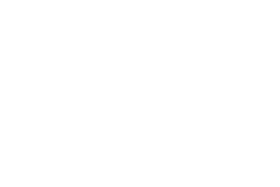
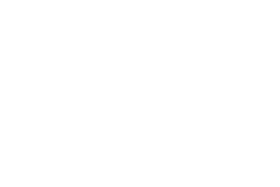
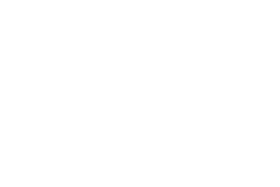
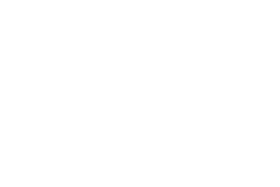
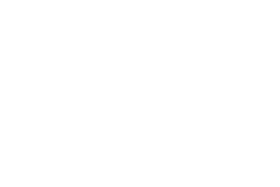
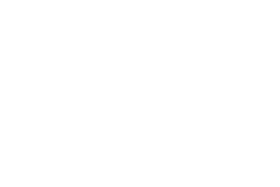
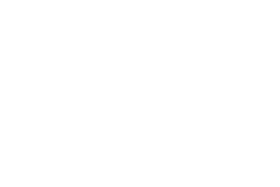
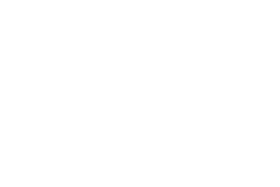
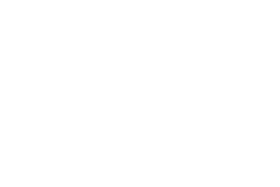
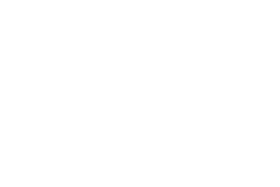
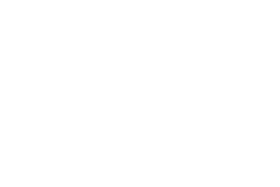
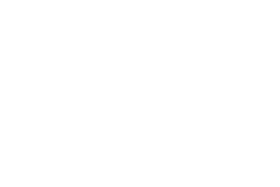
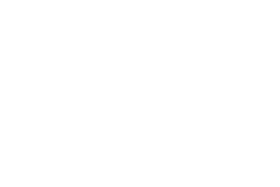
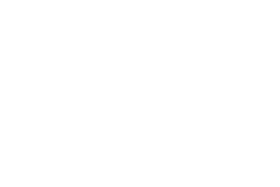
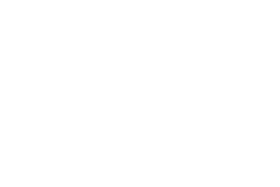
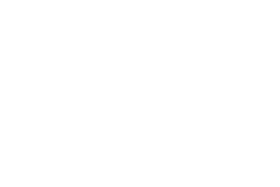
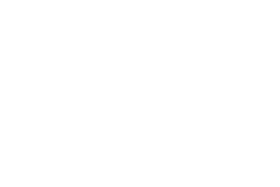
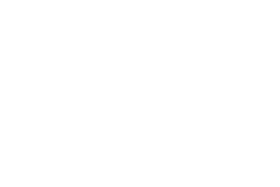
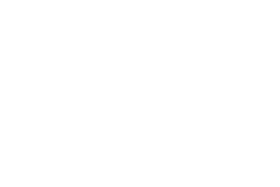
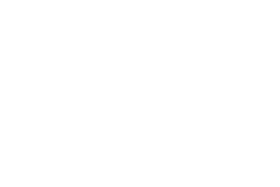
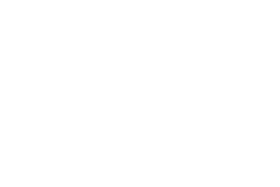
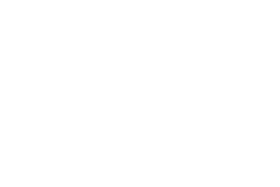
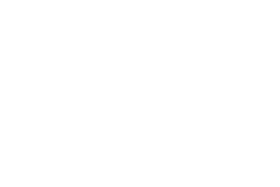
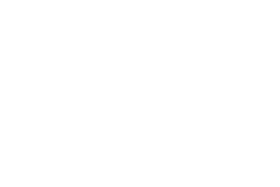
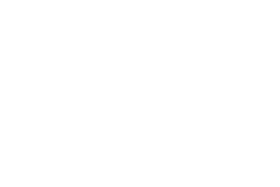
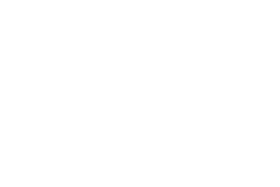
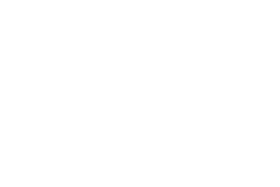
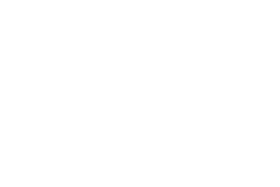
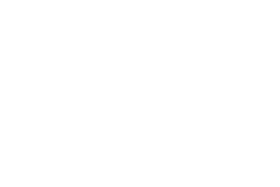
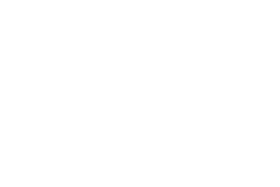
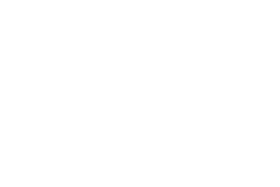
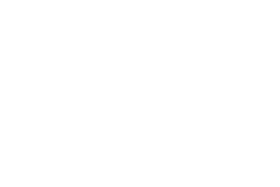
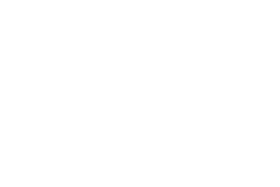
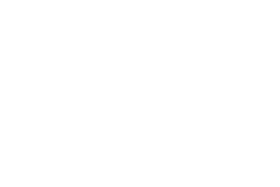
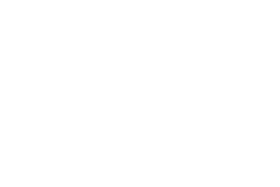
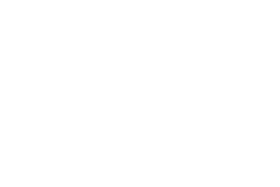
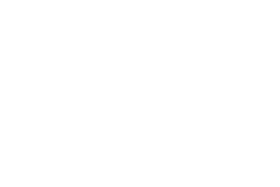
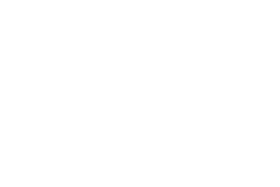
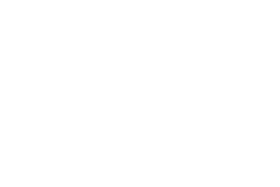
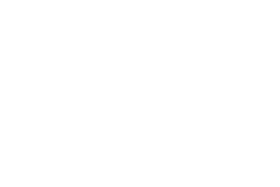
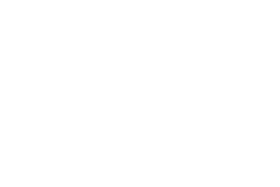
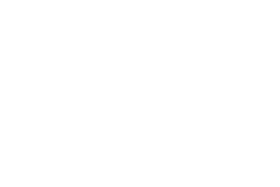
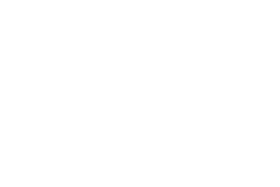
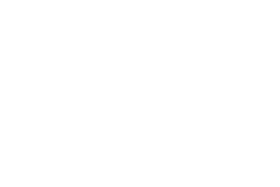
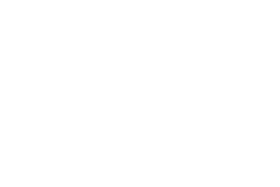
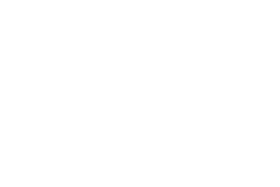
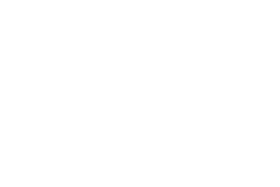
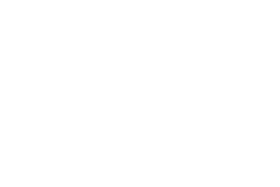
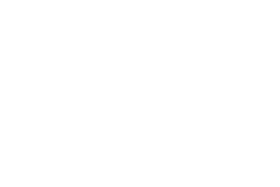
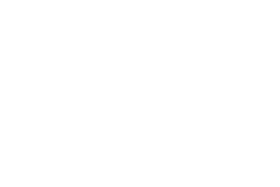
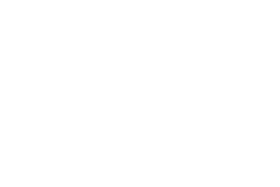
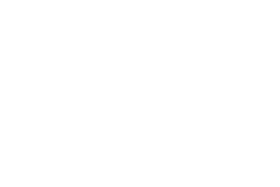
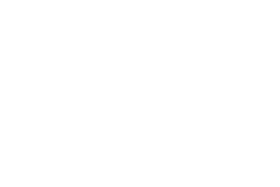
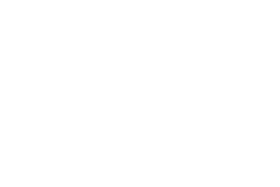
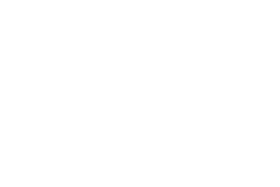
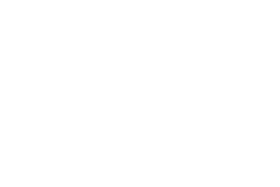
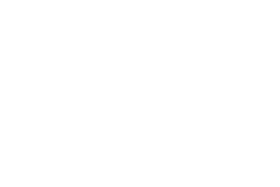
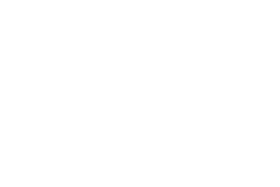
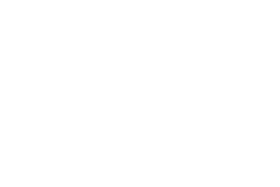
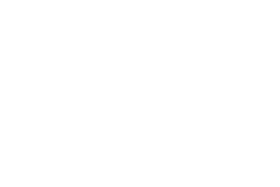
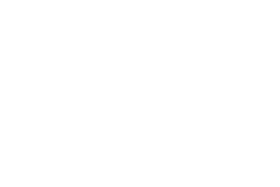
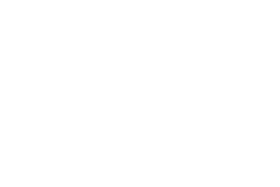
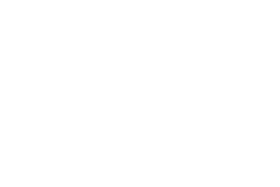
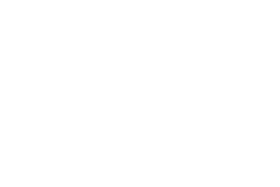
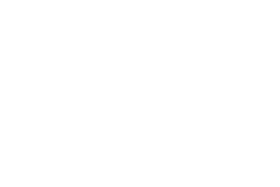
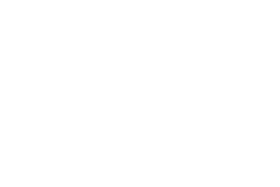
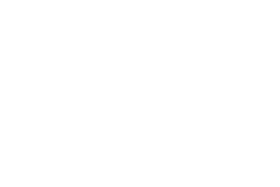
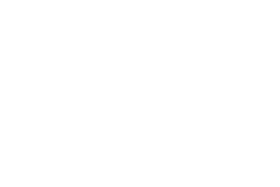
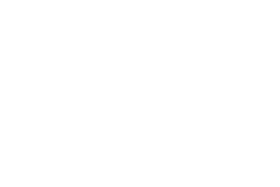
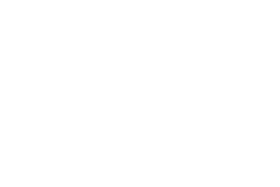
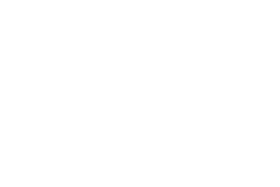
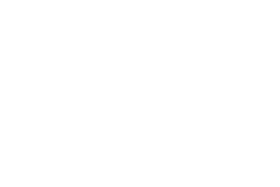
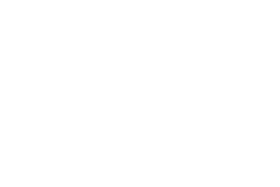
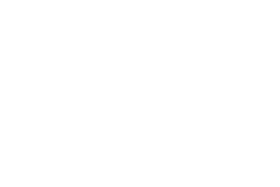
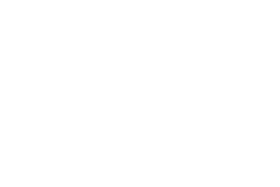
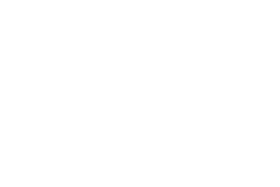
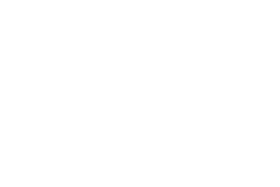
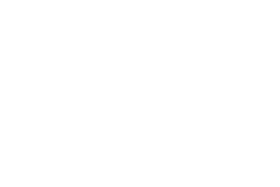
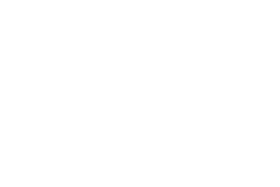
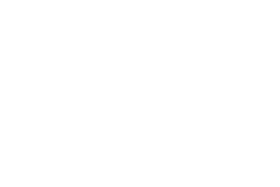
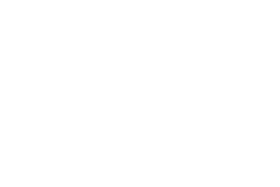
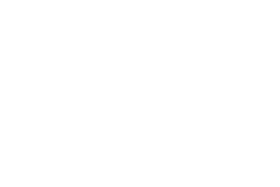
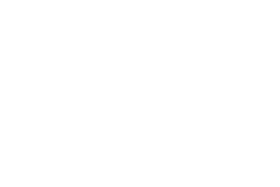
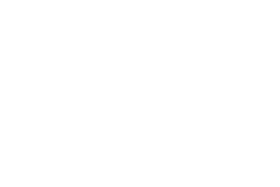
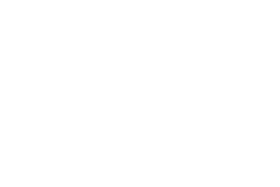
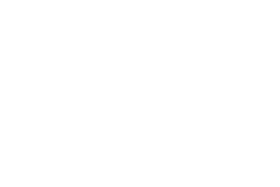
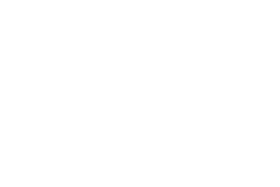
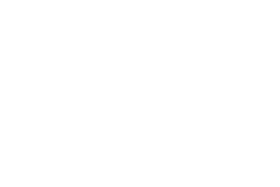
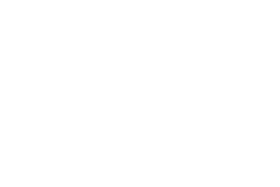
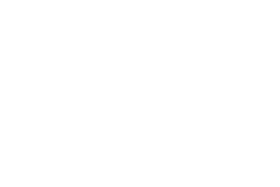
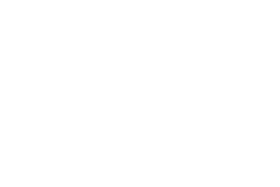
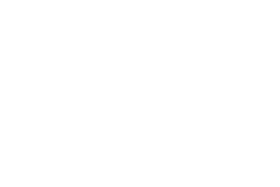
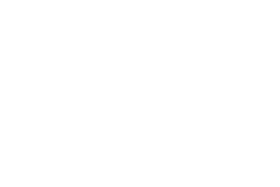
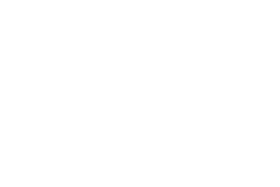
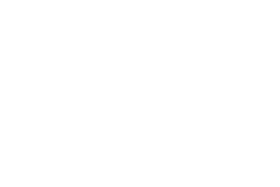
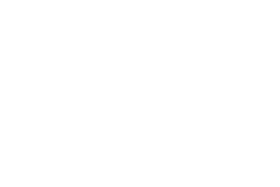
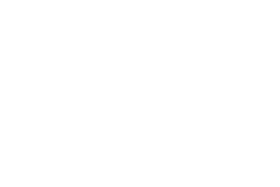
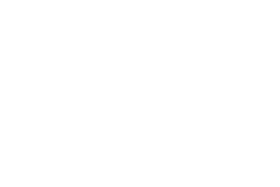
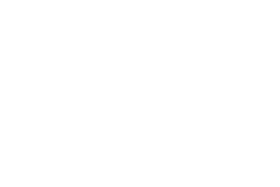
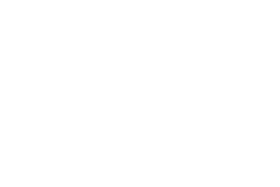
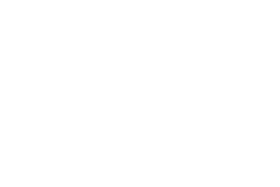
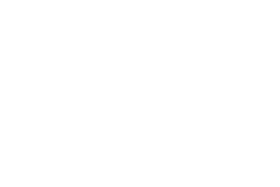
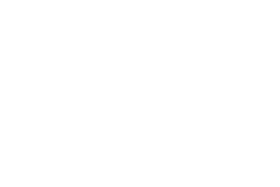
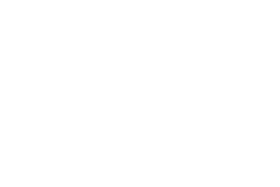
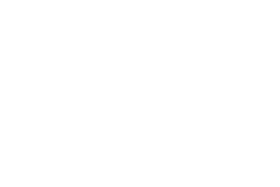
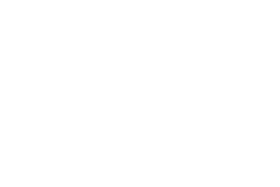
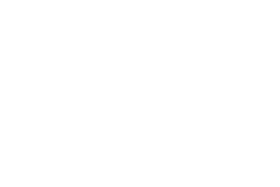

In [42]:
soup.prettify

In [43]:
ul=soup.find_all("ul",{"class":"zng-pagination-items"})

In [44]:
ul

[<ul class="zng-pagination-items"><li class="zng-pagination-item zng-pagination-active">
 <a class="zng-pagination-link" data-page="1" href="/kocaeli-satilik-konut"><span class="zng-pagination-link-text zng-pagination-mobile-hidden">1</span>
 <span class="zng-pagination-link-text zng-pagination-mobile-visible"><b>1</b> / 48</span></a>
 </li><li class="zng-pagination-item zng-pagination-mobile-next">
 <a class="zng-pagination-link" data-page="2" href="/kocaeli-satilik-konut?page=2"><span class="zng-pagination-link-text zng-pagination-mobile-hidden">2</span>
 <span class="zng-pagination-link-text zng-pagination-mobile-visible">Sonraki</span></a>
 </li><li class="zng-pagination-item zng-pagination-mobile-hidden">
 <a class="zng-pagination-link" data-page="3" href="/kocaeli-satilik-konut?page=3"><span class="zng-pagination-link-text">3</span></a>
 </li><li class="zng-pagination-item zng-pagination-mobile-hidden">
 <a class="zng-pagination-link" data-page="4" href="/kocaeli-satilik-konut?pa

In [45]:
li=soup.find_all("li",{"class":"zng-pagination-item"})

In [46]:
li

[<li class="zng-pagination-item zng-pagination-active">
 <a class="zng-pagination-link" data-page="1" href="/kocaeli-satilik-konut"><span class="zng-pagination-link-text zng-pagination-mobile-hidden">1</span>
 <span class="zng-pagination-link-text zng-pagination-mobile-visible"><b>1</b> / 48</span></a>
 </li>,
 <li class="zng-pagination-item zng-pagination-mobile-next">
 <a class="zng-pagination-link" data-page="2" href="/kocaeli-satilik-konut?page=2"><span class="zng-pagination-link-text zng-pagination-mobile-hidden">2</span>
 <span class="zng-pagination-link-text zng-pagination-mobile-visible">Sonraki</span></a>
 </li>,
 <li class="zng-pagination-item zng-pagination-mobile-hidden">
 <a class="zng-pagination-link" data-page="3" href="/kocaeli-satilik-konut?page=3"><span class="zng-pagination-link-text">3</span></a>
 </li>,
 <li class="zng-pagination-item zng-pagination-mobile-hidden">
 <a class="zng-pagination-link" data-page="4" href="/kocaeli-satilik-konut?page=4"><span class="zng-p

In [47]:
linkler=[]
for sayfa in li:
    link="https://www.zingat.com/kocaeli-satilik-konut?page"+sayfa.a.get("href")
    print(link)
    linkler.append(link)

https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=2
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=3
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=4
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=5
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=6
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=7
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=8
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=9
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=10
https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=48


In [48]:
i=11
for i in range(11,48,1):
    link="https://www.zingat.com/kocaeli-satilik-konut?page="+str(i)
    linkler.append(link)

print(linkler)    

['https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=2', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=3', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=4', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=5', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=6', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=7', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=8', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=9', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=10', 'https://www.zingat.com/kocaeli-satilik-konut?page/kocaeli-satilik-konut?page=48', 'https://www.zingat.com/kocaeli-satilik-konut?page=11', 'https://www.zingat.com/kocaeli-satilik-konut?

In [49]:
evler=[]
for i in linkler:
    page=requests.get(i,headers=headers)
    soup=BeautifulSoup(page.content,"html.parser")
    a=soup.find_all("a",{"class":"zl-card-inner"})
    for ev in a:
        evler.append(ev.get("href"))
        
    

In [50]:
evler

['/yenikoyde-mustakil-genis-bahce-kullanimli-luks-kose-villa-4976665i',
 '/karamursel-validekopru-koyu-satilik-mustakil-ev-ve-arsa-1687-m2-3896562i',
 '/basiskele-essiz-konumda-satilik-2-1-daire-4974387i',
 '/cayirova-ataturk-mh-2-1-ici-yenilenmis-satilik-120m2-arakat-4974780i',
 '/satilik-giris-3-1-daire-4426998i',
 '/basiskele-yenikoyde-satilik-site-ici-4-1-tripleks-havuzlu-villa-4975657i',
 '/kartepe-forum-anatoliada-2-1-bahce-kati-satilik-daire-4975095i',
 '/ataevler-hursoy-sitesinde-3-1-dubleks-daire-4843681i',
 '/tuana-3-etapta-deniz-manzarali-ebeveyn-banyolu-3-1-satilik-daire-4916798i',
 '/remax-dream-den-yahya-kaptanda-armada-kent-2-etapta-satilik-3-1-4823943i',
 '/kartepe-rose-garden-sitesinde-havuzlu-3-1-daire-4843683i',
 '/remax-dreamden-kiptas-cinar-evlerde-2-1-satilik-daire-4916779i',
 '/kent-konut-3-etapta-2-1-satilik-daire-4948706i',
 '/re-max-vizyondan-seymen-sahilde-firsat-daire-4973878i',
 '/remax-dreamden-karcity-sitesinde-1-1-satilik-daire-4916761i',
 '/basiskele-yu

In [51]:
# Dinamik bir DataFrame olulşturalım. Çünkü her evin feature sayısı aynı değil

In [52]:
df=pd.DataFrame(columns=["İlanTarihi","Netm²","Brütm²","OdaSayısı","BanyoSayısı",
                         "BinadakiKatSayısı","BulunduğuKat","IsıtmaTipi","BinaYaşı","MobilyaDurumu",
                         "YapınınDurumu","Fiyat"])

In [53]:
df

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat


In [54]:
# her bir evin verisini sözlüklere 
#dönüştürerek df nin içine tek tek ekleyelim:

In [55]:
for i in range(len(evler)):
    page=requests.get("https://www.zingat.com/kocaeli-satilik-konut"+evler[i],headers=headers)
    soup=BeautifulSoup(page.content,"html.parser")
    features=soup.find_all("li",{"class":"col-md-6"})
    row={feat_ev.strong.text.replace("\n","").replace(" ",""):feat_ev.span.text.replace("\n","").replace(" ","") for feat_ev in features}
    
    price=soup.find("div",{"class","listing-price"})
    tarih=soup.find("span",{"class","col-md-6"})

    
    row["Fiyat"]=price.text # ücretler farklı bir yerde olduğu için sonradan ekledik
    row["İlanTarihi"]=tarih.text
    df.loc[len(df.index)]=row
df

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat
0,6 Aralık 2023,150,160m²,3+1,1,2,Müstakil,Kombi(Doğalgaz),11-15arası,Eşyasız,İkinciEl,4.850.000 TL
1,5 Aralık 2023,100,120m²,3+1,1,NaN,Müstakil,Soba(Kömür),16-20arası,NaN,NaN,5.200.000 TL
2,4 Aralık 2023,91,100m²,2+1,1,3,ZeminKat,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.250.000 TL
3,5 Aralık 2023,115,120m²,2+1,1,4,2,Kombi(Doğalgaz),26-30arası,Eşyasız,NaN,1.850.000 TL
4,3 Aralık 2023,125,130m²,3+1,1,4,1,Kombi(Doğalgaz),6-10arası,Eşyasız,NaN,2.250.000 TL
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,13 Kasım 2023,65,80m²,2+1,1,3,2,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.150.000 TL
1004,16 Kasım 2023,210,240m²,NaN,NaN,2,NaN,YerdenIsıtma,0,NaN,NaN,15.000.000 TL
1005,14 Kasım 2023,60,90m²,2+1,1,3,2,NaN,0,Eşyasız,NaN,2.500.000 TL
1006,14 Kasım 2023,120,130m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570.000 TL


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   İlanTarihi         1008 non-null   object
 1   Netm²              1008 non-null   object
 2   Brütm²             1008 non-null   object
 3   OdaSayısı          857 non-null    object
 4   BanyoSayısı        856 non-null    object
 5   BinadakiKatSayısı  928 non-null    object
 6   BulunduğuKat       864 non-null    object
 7   IsıtmaTipi         693 non-null    object
 8   BinaYaşı           936 non-null    object
 9   MobilyaDurumu      679 non-null    object
 10  YapınınDurumu      443 non-null    object
 11  Fiyat              1008 non-null   object
dtypes: object(12)
memory usage: 102.4+ KB


In [57]:
df.to_csv("zingat evleri.csv",index=False)

In [249]:
data=pd.read_csv("zingat evleri.csv")
data

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat
0,6 Aralık 2023,150,160m²,3+1,1,2,Müstakil,Kombi(Doğalgaz),11-15arası,Eşyasız,İkinciEl,4.850.000 TL
1,5 Aralık 2023,100,120m²,3+1,1,NaN,Müstakil,Soba(Kömür),16-20arası,NaN,NaN,5.200.000 TL
2,4 Aralık 2023,91,100m²,2+1,1,3,ZeminKat,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.250.000 TL
3,5 Aralık 2023,115,120m²,2+1,1,4,2,Kombi(Doğalgaz),26-30arası,Eşyasız,NaN,1.850.000 TL
4,3 Aralık 2023,125,130m²,3+1,1,4,1,Kombi(Doğalgaz),6-10arası,Eşyasız,NaN,2.250.000 TL
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,13 Kasım 2023,65,80m²,2+1,1,3,2,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.150.000 TL
1004,16 Kasım 2023,210,240m²,NaN,NaN,2,NaN,YerdenIsıtma,0,NaN,NaN,15.000.000 TL
1005,14 Kasım 2023,60,90m²,2+1,1,3,2,NaN,0,Eşyasız,NaN,2.500.000 TL
1006,14 Kasım 2023,120,130m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570.000 TL


# Feature Engineering: 

In [250]:
# Tarihleri rakamsal görüntülemek için d dict oluşturalım:
d={"Ocak":1,"Eylül":9,"Şubat":2,"Mart":3,"Nisan":4,"Mayıs":5,"Haziran":6,"Temmuz":7,"Ağustos":8,"Ekim":10,"Kasım":11,"Aralık":12,"August":8}

In [251]:
for k,v in d.items():
    data["İlanTarihi"]=data["İlanTarihi"].str.replace(k,str(v))

In [252]:
data["İlanTarihi"]=pd.to_datetime(data["İlanTarihi"], format = '%d %m %Y')

In [253]:
data

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat
0,2023-12-06,150,160m²,3+1,1,2,Müstakil,Kombi(Doğalgaz),11-15arası,Eşyasız,İkinciEl,4.850.000 TL
1,2023-12-05,100,120m²,3+1,1,NaN,Müstakil,Soba(Kömür),16-20arası,NaN,NaN,5.200.000 TL
2,2023-12-04,91,100m²,2+1,1,3,ZeminKat,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.250.000 TL
3,2023-12-05,115,120m²,2+1,1,4,2,Kombi(Doğalgaz),26-30arası,Eşyasız,NaN,1.850.000 TL
4,2023-12-03,125,130m²,3+1,1,4,1,Kombi(Doğalgaz),6-10arası,Eşyasız,NaN,2.250.000 TL
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-11-13,65,80m²,2+1,1,3,2,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2.150.000 TL
1004,2023-11-16,210,240m²,NaN,NaN,2,NaN,YerdenIsıtma,0,NaN,NaN,15.000.000 TL
1005,2023-11-14,60,90m²,2+1,1,3,2,NaN,0,Eşyasız,NaN,2.500.000 TL
1006,2023-11-14,120,130m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570.000 TL


# Data Cleaning:

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   İlanTarihi         1008 non-null   datetime64[ns]
 1   Netm²              1008 non-null   object        
 2   Brütm²             1008 non-null   object        
 3   OdaSayısı          857 non-null    object        
 4   BanyoSayısı        856 non-null    object        
 5   BinadakiKatSayısı  928 non-null    object        
 6   BulunduğuKat       864 non-null    object        
 7   IsıtmaTipi         693 non-null    object        
 8   BinaYaşı           936 non-null    object        
 9   MobilyaDurumu      679 non-null    object        
 10  YapınınDurumu      443 non-null    object        
 11  Fiyat              1008 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 94.6+ KB


In [255]:
data["Netm²"]=data["Netm²"].str.replace("-","NaN")
data["Netm²"].unique()

array(['150', '100', '91', '115', '125', '165', '135', '149', '128', '80',
       '77', '110', '45', '220', '98', '157', '95', '393', '200', '82',
       '46', '120', '140', '32', '151', '145', '112', '33', '126', '55',
       '227', '180', '50', 'NaN', '75', '90', '144', '130', '85', '70',
       '83', '230', '210', '300', '72', '42', '600', '53', '147', '36',
       '400', '260', '63', '127', '94', '207', '167', '250', '350',
       '1439', '253', '280', '124', '155', '160', '509', '270', '263',
       '170', '249', '240', '190', '285', '87', '168', '122', '882',
       '289', '136', '65', '185', '195', '159', '111', '139', '97', '252',
       '158', '1600', '129', '105', '315', '888', '113', '96', '175',
       '121', '123', '259', '202', '245', '225', '405', '194', '226',
       '203', '74', '20', '22', '14', '56', '21', '84', '17', '39', '78',
       '99', '67', '114', '2139', '680', '1900', '235', '40', '88', '6',
       '116', '410', '57', '79', '197', '62', '161', '68', '179', 

In [116]:
data["Netm²"]=data["Netm²"].astype("float32")

In [256]:
data["Netm²"]=data["Netm²"].str.replace("NaN","100")

In [257]:
data["Netm²"]=data["Netm²"].fillna(data["Netm²"].mean())

In [258]:
data["Brütm²"]=data["Brütm²"].str.replace("m²","").astype("float")

In [259]:
data["OdaSayısı"]=data["OdaSayısı"].str.replace("Stüdyo","+0").str.replace("veüzeri","")

In [260]:
data["OdaSayısı"]=data["OdaSayısı"].str[0:3]

In [261]:
data["OdaSayısı"].value_counts()

3+1    301
2+1    294
4+1    131
1+1     36
5+1     34
5+2     15
4+2     10
6+1      8
6+2      7
2+0      3
3+2      3
1+0      3
5+3      2
10       2
8+3      2
8+2      2
7+2      1
6+3      1
9+2      1
2+2      1
Name: OdaSayısı, dtype: int64

In [262]:
data["OdaSayısı"]=data["OdaSayısı"].str.replace("10","5+5")

In [263]:
data["OdaSayısı"]=data["OdaSayısı"].fillna("0")

In [264]:
data["OdaSayısı"]=data["OdaSayısı"].apply(lambda x:eval(str(x))) #sayısal değere çevirdik toplam oda sayısı olarak aldık

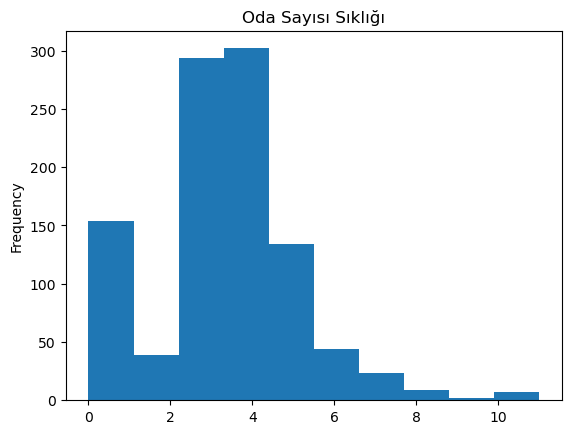

In [265]:
data["OdaSayısı"].plot(kind="hist",title="Oda Sayısı Sıklığı");

In [266]:
data["BanyoSayısı"].value_counts()

1           504
2           257
3            59
4            22
5             7
6veüzeri      6
0             1
Name: BanyoSayısı, dtype: int64

In [267]:
data["BanyoSayısı"]=data["BanyoSayısı"].str.replace("veüzeri","")

In [268]:
data["BanyoSayısı"].value_counts()

1    504
2    257
3     59
4     22
5      7
6      6
0      1
Name: BanyoSayısı, dtype: int64

In [269]:
data["BinadakiKatSayısı"].value_counts()

3             373
4             226
2             109
5              93
10-20arası     26
9              26
6              26
1              21
8              15
7              11
10              2
Name: BinadakiKatSayısı, dtype: int64

In [270]:
data["BinadakiKatSayısı"]=data["BinadakiKatSayısı"].str.replace("veüzeri","").str.replace("-20arası","")

In [271]:
data["BinadakiKatSayısı"]=data["BinadakiKatSayısı"].str.replace("Between10-20","10").str.replace("+","")

In [272]:
data["BinadakiKatSayısı"].fillna(data["BinadakiKatSayısı"].mode()[0],inplace=True)

In [273]:
data["BinadakiKatSayısı"]=data["BinadakiKatSayısı"].astype("int32")

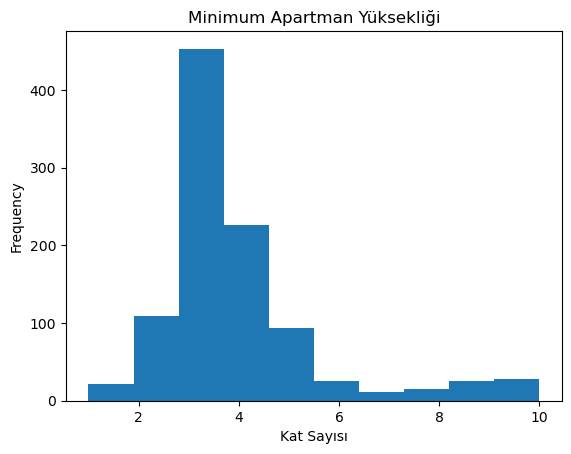

In [274]:
data["BinadakiKatSayısı"].plot(kind="hist",title="Minimum Apartman Yüksekliği")
plt.xlabel("Kat Sayısı");

In [275]:
data["Fiyat"]=data["Fiyat"].str.replace("TL","").str.replace(".","")

In [276]:
data["Fiyat"]=data["Fiyat"].astype("float")

In [277]:
data["Yıl"]=data["İlanTarihi"].dt.year
data["Ay"]=data["İlanTarihi"].dt.month
data

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat,Yıl,Ay
0,2023-12-06,150,160.0,4,1,2,Müstakil,Kombi(Doğalgaz),11-15arası,Eşyasız,İkinciEl,4850000.0,2023,12
1,2023-12-05,100,120.0,4,1,3,Müstakil,Soba(Kömür),16-20arası,NaN,NaN,5200000.0,2023,12
2,2023-12-04,91,100.0,3,1,3,ZeminKat,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2250000.0,2023,12
3,2023-12-05,115,120.0,3,1,4,2,Kombi(Doğalgaz),26-30arası,Eşyasız,NaN,1850000.0,2023,12
4,2023-12-03,125,130.0,4,1,4,1,Kombi(Doğalgaz),6-10arası,Eşyasız,NaN,2250000.0,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-11-13,65,80.0,3,1,3,2,Kombi(Doğalgaz),0,Eşyasız,Sıfır,2150000.0,2023,11
1004,2023-11-16,210,240.0,0,NaN,2,NaN,YerdenIsıtma,0,NaN,NaN,15000000.0,2023,11
1005,2023-11-14,60,90.0,3,1,3,2,NaN,0,Eşyasız,NaN,2500000.0,2023,11
1006,2023-11-14,120,130.0,0,NaN,3,NaN,NaN,NaN,NaN,NaN,2570000.0,2023,11


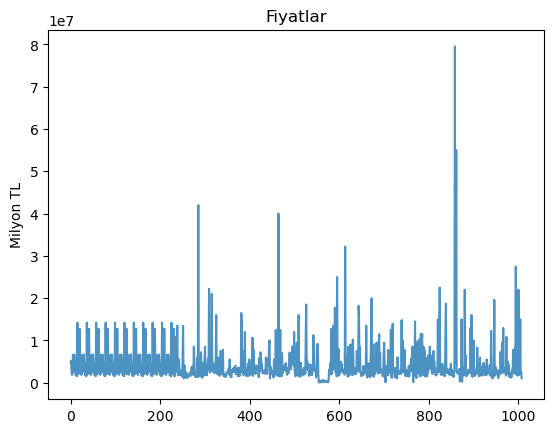

In [278]:
plt.plot(data["Fiyat"],alpha=.8,)
plt.title("Fiyatlar")
plt.ylabel("Milyon TL")
plt.show();

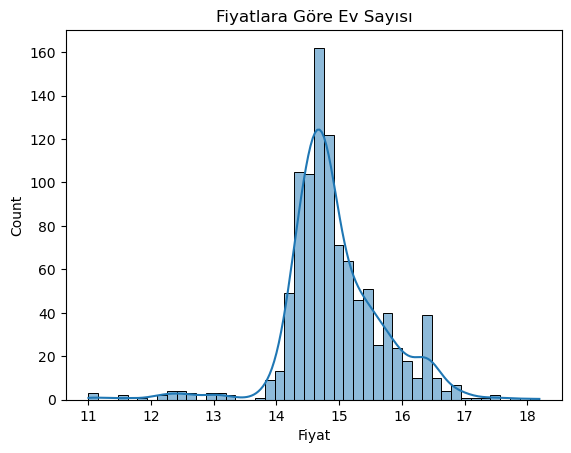

In [279]:
sns.histplot(x=np.log(data["Fiyat"]),kde=True)
plt.title("Fiyatlara Göre Ev Sayısı");

In [280]:
data["BulunduğuKat"].unique()

array(['Müstakil', 'ZeminKat', '2', '1', 'Bahçekatı', '12', 'GirişKatı',
       'YüksekGiriş', '3', '11', '9', nan, 'ÇatıKatı', '5', '4',
       'EnÜstKat', 'Kot2', 'Komple', 'FirstFloor', 'Kot3', '8', '6',
       'Kot1', '14'], dtype=object)

In [281]:
data["BulunduğuKat"]=data["BulunduğuKat"].replace(["Müstakil","Kot2","Kot3","Kot1","Bahçekatı","GirişKatı","YüksekGiriş","ZeminKat","Komple","FirstFloor"],"0",regex=True)
data["BulunduğuKat"]=data["BulunduğuKat"].str.replace("EnÜstKat","12")
data["BulunduğuKat"]=data["BulunduğuKat"].str.replace("ÇatıKatı","12")
data["BulunduğuKat"]=data["BulunduğuKat"].fillna("0")

In [282]:
data["BulunduğuKat"].value_counts()

0     477
2     185
3     144
1      64
4      49
12     34
5      27
9      12
11     11
6       2
14      2
8       1
Name: BulunduğuKat, dtype: int64

In [283]:
data["BulunduğuKat"].unique()

array(['0', '2', '1', '12', '3', '11', '9', '5', '4', '8', '6', '14'],
      dtype=object)

In [284]:
data.isnull().sum()

İlanTarihi             0
Netm²                  0
Brütm²                 0
OdaSayısı              0
BanyoSayısı          152
BinadakiKatSayısı      0
BulunduğuKat           0
IsıtmaTipi           315
BinaYaşı              72
MobilyaDurumu        329
YapınınDurumu        565
Fiyat                  0
Yıl                    0
Ay                     0
dtype: int64

In [285]:
data["IsıtmaTipi"].value_counts()

Kombi(Doğalgaz)                361
YerdenIsıtma                   119
Soba(Kömür)                     54
MerkeziSistem(IsıPayıÖlçer)     50
Kalorifer(Doğalgaz)             47
MerkeziSistem                   20
Klima                           18
Yok                              8
Soba(Doğalgaz)                   4
KatKaloriferi                    4
CombiBoiler(NaturalGas)          3
Kalorifer(Akaryakıt)             2
GüneşEnerjisi                    1
Kalorifer(Kömür)                 1
Kombi(Elektrikli)                1
Name: IsıtmaTipi, dtype: int64

In [286]:
#Isıtma sistemi var yok şeklinde olsun:
data["IsıtmaTipi"]=data["IsıtmaTipi"].replace(["KatKaloriferi","Kombi(Elektrikli)","Kalorifer(Akaryakıt)","Stove(Coal)","Kombi(Doğalgaz)","MerkeziSistem(IsıPayıÖlçer)","Klima",
                "YerdenIsıtma","MerkeziSistem","Kalorifer(Doğalgaz)","Fancoil","FloorHeating","AirConditioner"
            ,"CombiBoiler(NaturalGas)","CentralSystem(HeatShareMeter)","GüneşEnerjisi"],"1")

In [287]:
data["IsıtmaTipi"]=data["IsıtmaTipi"].replace(["Soba(Doğalgaz)","Soba(Kömür)","Yok","Kalorifer(Kömür)"],"0")

In [288]:
data["IsıtmaTipi"].value_counts()

1    626
0     67
Name: IsıtmaTipi, dtype: int64

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   İlanTarihi         1008 non-null   datetime64[ns]
 1   Netm²              1008 non-null   object        
 2   Brütm²             1008 non-null   float64       
 3   OdaSayısı          1008 non-null   int64         
 4   BanyoSayısı        856 non-null    object        
 5   BinadakiKatSayısı  1008 non-null   int32         
 6   BulunduğuKat       1008 non-null   object        
 7   IsıtmaTipi         693 non-null    object        
 8   BinaYaşı           936 non-null    object        
 9   MobilyaDurumu      679 non-null    object        
 10  YapınınDurumu      443 non-null    object        
 11  Fiyat              1008 non-null   float64       
 12  Yıl                1008 non-null   int64         
 13  Ay                 1008 non-null   int64         
dtypes: datet

In [290]:
data["IsıtmaTipi"]=data["IsıtmaTipi"].astype("float")

In [291]:
data.corr()["IsıtmaTipi"]

Brütm²              -0.132276
OdaSayısı            0.087120
BinadakiKatSayısı    0.236523
IsıtmaTipi           1.000000
Fiyat                0.097336
Yıl                       NaN
Ay                   0.027282
Name: IsıtmaTipi, dtype: float64

In [292]:
#Isıtma tiplerini yine GradienBoosting ile belirleyelim:
x_dolu=data.loc[data["IsıtmaTipi"].notnull()].filter(["Netm²","Brütm²","Fiyat","BulunduğuKat","BinadakiKatSayısı"])
y_dolu=data.loc[data["IsıtmaTipi"].notnull()]["IsıtmaTipi"]
x_bos=data.loc[data["IsıtmaTipi"].isnull()].filter(["Netm²","Brütm²","Fiyat","BulunduğuKat","BinadakiKatSayısı"])
#gb ve dt classifier
kn=KNeighborsClassifier()

In [293]:
model=kn.fit(x_dolu,y_dolu)

In [294]:
tahmin=model.predict(x_dolu)

In [295]:
accuracy_score(y_dolu,tahmin) # kn en güzel sonucu verdi

0.9581529581529582

In [296]:
data_bos=data.loc[data["IsıtmaTipi"].isnull()]
data_dolu=data.loc[data["IsıtmaTipi"].notnull()]

In [297]:
y_bos=model.predict(x_bos)
y_bos

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [298]:
data_bos["IsıtmaTipi"]=y_bos

In [299]:
data=data_dolu.append(data_bos,ignore_index=True)

In [300]:
data.isnull().sum()

İlanTarihi             0
Netm²                  0
Brütm²                 0
OdaSayısı              0
BanyoSayısı          152
BinadakiKatSayısı      0
BulunduğuKat           0
IsıtmaTipi             0
BinaYaşı              72
MobilyaDurumu        329
YapınınDurumu        565
Fiyat                  0
Yıl                    0
Ay                     0
dtype: int64

In [301]:
data["BinaYaşı"].value_counts()

0               270
6-10arası       222
11-15arası       92
21-25arası       60
4                51
16-20arası       49
26-30arası       46
1                33
3                33
31-35arası       29
5                18
2                18
40veüzeri         9
Between6-10       3
36-40arası        2
Between11-15      1
Name: BinaYaşı, dtype: int64

In [302]:
data["BinaYaşı"]=data["BinaYaşı"].str.extract("([0-9]+)",expand=False) # verideki en düşük yılları aldık...

In [303]:
data["BinaYaşı"]=data["BinaYaşı"].astype("float")

In [304]:
data["BinaYaşı"]=data["BinaYaşı"].fillna("1.0")

In [305]:
data["BinaYaşı"].value_counts()

0.0     270
6.0     225
11.0     93
1.0      72
21.0     60
4.0      51
16.0     49
26.0     46
1.0      33
3.0      33
31.0     29
5.0      18
2.0      18
40.0      9
36.0      2
Name: BinaYaşı, dtype: int64

In [306]:
data.isnull().sum()

İlanTarihi             0
Netm²                  0
Brütm²                 0
OdaSayısı              0
BanyoSayısı          152
BinadakiKatSayısı      0
BulunduğuKat           0
IsıtmaTipi             0
BinaYaşı               0
MobilyaDurumu        329
YapınınDurumu        565
Fiyat                  0
Yıl                    0
Ay                     0
dtype: int64

In [307]:
data["BanyoSayısı"].fillna(data["BanyoSayısı"].mode()[0],inplace=True)

In [308]:
data.isnull().sum()

İlanTarihi             0
Netm²                  0
Brütm²                 0
OdaSayısı              0
BanyoSayısı            0
BinadakiKatSayısı      0
BulunduğuKat           0
IsıtmaTipi             0
BinaYaşı               0
MobilyaDurumu        329
YapınınDurumu        565
Fiyat                  0
Yıl                    0
Ay                     0
dtype: int64

In [309]:
data["MobilyaDurumu"].value_counts()

Eşyasız              616
Eşyalı(Mobilyalı)     32
SadeceBeyazEşya       19
SadeceMutfak           7
Unfurnished            5
Name: MobilyaDurumu, dtype: int64

In [310]:
data["MobilyaDurumu"]=data["MobilyaDurumu"].replace(["Eşyasız","Unfurnished"],0).replace(["Eşyalı(Mobilyalı)","SadeceBeyazEşya","SadeceMutfak","OnlyMajorAppliances"],1)


In [311]:
data["MobilyaDurumu"].value_counts()

0.0    621
1.0     58
Name: MobilyaDurumu, dtype: int64

In [312]:
# mode ile dolduralım boş yerleri:
data["MobilyaDurumu"]=data["MobilyaDurumu"].fillna(df["MobilyaDurumu"].mode()[0])

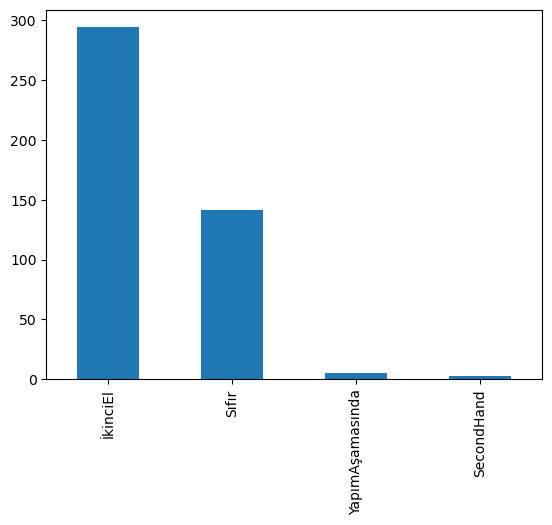

In [313]:
data["YapınınDurumu"].value_counts().plot(kind="bar");

In [314]:
data["YapınınDurumu"].unique()

array(['İkinciEl', nan, 'Sıfır', 'YapımAşamasında', 'SecondHand'],
      dtype=object)

In [315]:
data["YapınınDurumu"]=data["YapınınDurumu"].replace(["İkinciEl","SecondHand"],1).replace(["YapımAşamasında"],0).replace(["Sıfır"],2)

In [316]:
data["YapınınDurumu"].unique()

array([ 1., nan,  2.,  0.])

In [317]:
data["YapınınDurumu"].fillna(data["YapınınDurumu"].mode()[0],inplace=True)

<function matplotlib.pyplot.legend(*args, **kwargs)>

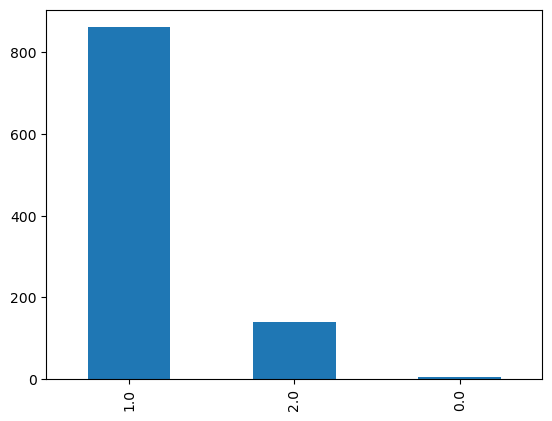

In [318]:
data["YapınınDurumu"].value_counts().plot(kind="bar")
plt.legend

In [319]:
data.isnull().sum() #verimiz temiz hale gelmiştir

İlanTarihi           0
Netm²                0
Brütm²               0
OdaSayısı            0
BanyoSayısı          0
BinadakiKatSayısı    0
BulunduğuKat         0
IsıtmaTipi           0
BinaYaşı             0
MobilyaDurumu        0
YapınınDurumu        0
Fiyat                0
Yıl                  0
Ay                   0
dtype: int64

In [320]:
data # elden geçmiş data

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat,Yıl,Ay
0,2023-12-06,150,160.0,4,1,2,0,1.0,11.0,0.0,1.0,4850000.0,2023,12
1,2023-12-05,100,120.0,4,1,3,0,0.0,16.0,Eşyasız,1.0,5200000.0,2023,12
2,2023-12-04,91,100.0,3,1,3,0,1.0,0.0,0.0,2.0,2250000.0,2023,12
3,2023-12-05,115,120.0,3,1,4,2,1.0,26.0,0.0,1.0,1850000.0,2023,12
4,2023-12-03,125,130.0,4,1,4,1,1.0,6.0,0.0,1.0,2250000.0,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-11-16,120,150.0,4,1,5,3,1.0,31.0,0.0,1.0,1790000.0,2023,11
1004,2023-11-15,102,110.0,3,1,4,3,1.0,0.0,0.0,1.0,2700000.0,2023,11
1005,2023-11-14,60,90.0,3,1,3,2,1.0,0.0,0.0,1.0,2500000.0,2023,11
1006,2023-11-14,120,130.0,0,1,3,0,1.0,1.0,Eşyasız,1.0,2570000.0,2023,11


In [321]:
data["MobilyaDurumu"].value_counts()

0.0        621
Eşyasız    329
1.0         58
Name: MobilyaDurumu, dtype: int64

In [322]:
data["MobilyaDurumu"]=data["MobilyaDurumu"].replace(["Eşyasız","Unfurnished"],0).replace(["Eşyalı(Mobilyalı)","SadeceBeyazEşya","SadeceMutfak","OnlyMajorAppliances"],1)

In [323]:
data["MobilyaDurumu"].value_counts()

0.0    950
1.0     58
Name: MobilyaDurumu, dtype: int64

In [324]:
data # elden geçmiş data

,İlanTarihi,Netm²,Brütm²,OdaSayısı,BanyoSayısı,BinadakiKatSayısı,BulunduğuKat,IsıtmaTipi,BinaYaşı,MobilyaDurumu,YapınınDurumu,Fiyat,Yıl,Ay
0,2023-12-06,150,160.0,4,1,2,0,1.0,11.0,0.0,1.0,4850000.0,2023,12
1,2023-12-05,100,120.0,4,1,3,0,0.0,16.0,0.0,1.0,5200000.0,2023,12
2,2023-12-04,91,100.0,3,1,3,0,1.0,0.0,0.0,2.0,2250000.0,2023,12
3,2023-12-05,115,120.0,3,1,4,2,1.0,26.0,0.0,1.0,1850000.0,2023,12
4,2023-12-03,125,130.0,4,1,4,1,1.0,6.0,0.0,1.0,2250000.0,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-11-16,120,150.0,4,1,5,3,1.0,31.0,0.0,1.0,1790000.0,2023,11
1004,2023-11-15,102,110.0,3,1,4,3,1.0,0.0,0.0,1.0,2700000.0,2023,11
1005,2023-11-14,60,90.0,3,1,3,2,1.0,0.0,0.0,1.0,2500000.0,2023,11
1006,2023-11-14,120,130.0,0,1,3,0,1.0,1.0,0.0,1.0,2570000.0,2023,11


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   İlanTarihi         1008 non-null   datetime64[ns]
 1   Netm²              1008 non-null   object        
 2   Brütm²             1008 non-null   float64       
 3   OdaSayısı          1008 non-null   int64         
 4   BanyoSayısı        1008 non-null   object        
 5   BinadakiKatSayısı  1008 non-null   int32         
 6   BulunduğuKat       1008 non-null   object        
 7   IsıtmaTipi         1008 non-null   float64       
 8   BinaYaşı           1008 non-null   object        
 9   MobilyaDurumu      1008 non-null   float64       
 10  YapınınDurumu      1008 non-null   float64       
 11  Fiyat              1008 non-null   float64       
 12  Yıl                1008 non-null   int64         
 13  Ay                 1008 non-null   int64         
dtypes: datet

In [327]:
data.drop("İlanTarihi",axis=1,inplace=True)

In [328]:
data.to_csv("hazır333.csv")

In [329]:
# tüm bu işlemlerden sonra kendi fiyat tahminlememize başlayabiliriz. Önce train test split i import edelim:
from sklearn.model_selection import train_test_split

In [330]:
# verileri eğitime hazırlamak için bazı oulier ları silmemiz lazım:

In [331]:
data.corr()["Fiyat"]

Brütm²               0.577915
OdaSayısı            0.367962
BinadakiKatSayısı   -0.129937
IsıtmaTipi           0.063112
MobilyaDurumu        0.108845
YapınınDurumu        0.058968
Fiyat                1.000000
Yıl                       NaN
Ay                  -0.062488
Name: Fiyat, dtype: float64

In [332]:
data=pd.get_dummies(data,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye 

In [333]:
x=data.drop("Fiyat",axis=1)
y=data[["Fiyat"]]

In [334]:
x

,Brütm²,OdaSayısı,BinadakiKatSayısı,IsıtmaTipi,MobilyaDurumu,YapınınDurumu,Yıl,Ay,Netm²_102,Netm²_103,...,BinaYaşı_5.0,BinaYaşı_6.0,BinaYaşı_11.0,BinaYaşı_16.0,BinaYaşı_21.0,BinaYaşı_26.0,BinaYaşı_31.0,BinaYaşı_36.0,BinaYaşı_40.0,BinaYaşı_1.0
0,160.0,4,2,1.0,0.0,1.0,2023,12,0,0,...,0,0,1,0,0,0,0,0,0,0
1,120.0,4,3,0.0,0.0,1.0,2023,12,0,0,...,0,0,0,1,0,0,0,0,0,0
2,100.0,3,3,1.0,0.0,2.0,2023,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120.0,3,4,1.0,0.0,1.0,2023,12,0,0,...,0,0,0,0,0,1,0,0,0,0
4,130.0,4,4,1.0,0.0,1.0,2023,12,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,150.0,4,5,1.0,0.0,1.0,2023,11,0,0,...,0,0,0,0,0,0,1,0,0,0
1004,110.0,3,4,1.0,0.0,1.0,2023,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1005,90.0,3,3,1.0,0.0,1.0,2023,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,130.0,0,3,1.0,0.0,1.0,2023,11,0,0,...,0,0,0,0,0,0,0,0,0,1


In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [336]:
lr=LinearRegression()
gb=GradientBoostingRegressor()
et=ExtraTreeRegressor()
r=Ridge()
l=Lasso()

In [337]:
model=gb.fit(x_train,y_train)

In [338]:
tahmin=model.predict(x_test)

In [339]:
r2_score(y_test,tahmin)

0.7546237995283742

In [340]:
mean_squared_error(y_test,tahmin)**0.5

1841142.8238903377

In [342]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [359]:
model=Sequential()
model.add(Dense(1000,activation="relu"))
model.add(Dense(640,activation="relu"))
model.add(Dense(320,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))#activation u sildik dikkat otomatik regression oldu
model.compile(loss="mse",optimizer="adam")

In [360]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500,batch_size=20,verbose=1)

Epoch 1/1500
41/41 [==============================] - 2s 23ms/step - loss: 44019413417984.0000 - val_loss: 22137511346176.0000
Epoch 2/1500
41/41 [==============================] - 1s 17ms/step - loss: 27876762058752.0000 - val_loss: 13084389277696.0000
Epoch 3/1500
41/41 [==============================] - 1s 17ms/step - loss: 24292865605632.0000 - val_loss: 12676068540416.0000
Epoch 4/1500
41/41 [==============================] - 1s 17ms/step - loss: 22810422411264.0000 - val_loss: 12510428135424.0000
Epoch 5/1500
41/41 [==============================] - 1s 17ms/step - loss: 21068773326848.0000 - val_loss: 11935809536000.0000
Epoch 6/1500
41/41 [==============================] - 1s 17ms/step - loss: 19629145587712.0000 - val_loss: 11090443370496.0000
Epoch 7/1500
41/41 [==============================] - 1s 17ms/step - loss: 18710316187648.0000 - val_loss: 10760668315648.0000
Epoch 8/1500
41/41 [==============================] - 1s 17ms/step - loss: 18179443130368.0000 - val_loss: 1068

41/41 [==============================] - 1s 18ms/step - loss: 17984198279168.0000 - val_loss: 9914419249152.0000
Epoch 66/1500
41/41 [==============================] - 1s 17ms/step - loss: 17674685906944.0000 - val_loss: 9882036076544.0000
Epoch 67/1500
41/41 [==============================] - 1s 17ms/step - loss: 17619465797632.0000 - val_loss: 9806341472256.0000
Epoch 68/1500
41/41 [==============================] - 1s 17ms/step - loss: 17452791496704.0000 - val_loss: 9793097957376.0000
Epoch 69/1500
41/41 [==============================] - 1s 17ms/step - loss: 18135369383936.0000 - val_loss: 9703942782976.0000
Epoch 70/1500
41/41 [==============================] - 1s 17ms/step - loss: 19841488519168.0000 - val_loss: 10791019347968.0000
Epoch 71/1500
41/41 [==============================] - 1s 17ms/step - loss: 17197777813504.0000 - val_loss: 9703457292288.0000
Epoch 72/1500
41/41 [==============================] - 1s 17ms/step - loss: 18110746722304.0000 - val_loss: 10876472000512.0

41/41 [==============================] - 1s 17ms/step - loss: 15976548532224.0000 - val_loss: 7676354887680.0000
Epoch 130/1500
41/41 [==============================] - 1s 17ms/step - loss: 16392078229504.0000 - val_loss: 7942811156480.0000
Epoch 131/1500
41/41 [==============================] - 1s 17ms/step - loss: 15394944319488.0000 - val_loss: 7773011574784.0000
Epoch 132/1500
41/41 [==============================] - 1s 17ms/step - loss: 15484178137088.0000 - val_loss: 8305755291648.0000
Epoch 133/1500
41/41 [==============================] - 1s 17ms/step - loss: 16590578909184.0000 - val_loss: 8778259365888.0000
Epoch 134/1500
41/41 [==============================] - 1s 17ms/step - loss: 15849493626880.0000 - val_loss: 7929857048576.0000
Epoch 135/1500
41/41 [==============================] - 1s 17ms/step - loss: 15979184652288.0000 - val_loss: 8038975537152.0000
Epoch 136/1500
41/41 [==============================] - 1s 17ms/step - loss: 15844326244352.0000 - val_loss: 7516572876

41/41 [==============================] - 1s 18ms/step - loss: 13486605205504.0000 - val_loss: 5794318254080.0000
Epoch 194/1500
41/41 [==============================] - 1s 17ms/step - loss: 13657871220736.0000 - val_loss: 5978661584896.0000
Epoch 195/1500
41/41 [==============================] - 1s 19ms/step - loss: 12425128574976.0000 - val_loss: 6339417341952.0000
Epoch 196/1500
41/41 [==============================] - 1s 19ms/step - loss: 13869795770368.0000 - val_loss: 5730261270528.0000
Epoch 197/1500
41/41 [==============================] - 1s 19ms/step - loss: 12897436565504.0000 - val_loss: 5778411880448.0000
Epoch 198/1500
41/41 [==============================] - 1s 19ms/step - loss: 13473185529856.0000 - val_loss: 6671463612416.0000
Epoch 199/1500
41/41 [==============================] - 1s 19ms/step - loss: 12814719647744.0000 - val_loss: 5525958295552.0000
Epoch 200/1500
41/41 [==============================] - 1s 18ms/step - loss: 12688550789120.0000 - val_loss: 5692126134

41/41 [==============================] - 1s 17ms/step - loss: 11927618060288.0000 - val_loss: 5716120174592.0000
Epoch 258/1500
41/41 [==============================] - 1s 18ms/step - loss: 12518667845632.0000 - val_loss: 4924034252800.0000
Epoch 259/1500
41/41 [==============================] - 1s 17ms/step - loss: 12782906900480.0000 - val_loss: 4787787005952.0000
Epoch 260/1500
41/41 [==============================] - 1s 18ms/step - loss: 11994810810368.0000 - val_loss: 4660180549632.0000
Epoch 261/1500
41/41 [==============================] - 1s 17ms/step - loss: 12840838627328.0000 - val_loss: 5132417236992.0000
Epoch 262/1500
41/41 [==============================] - 1s 17ms/step - loss: 11575581736960.0000 - val_loss: 4621346013184.0000
Epoch 263/1500
41/41 [==============================] - 1s 18ms/step - loss: 12430053736448.0000 - val_loss: 4743156989952.0000
Epoch 264/1500
41/41 [==============================] - 1s 18ms/step - loss: 12156216016896.0000 - val_loss: 4961758347

41/41 [==============================] - 1s 18ms/step - loss: 10240066060288.0000 - val_loss: 4778528079872.0000
Epoch 322/1500
41/41 [==============================] - 1s 18ms/step - loss: 11382229565440.0000 - val_loss: 4526878752768.0000
Epoch 323/1500
41/41 [==============================] - 1s 18ms/step - loss: 11289989480448.0000 - val_loss: 7316734738432.0000
Epoch 324/1500
41/41 [==============================] - 1s 18ms/step - loss: 11903348768768.0000 - val_loss: 6126815936512.0000
Epoch 325/1500
41/41 [==============================] - 1s 18ms/step - loss: 11761958780928.0000 - val_loss: 4577848983552.0000
Epoch 326/1500
41/41 [==============================] - 1s 17ms/step - loss: 12151606476800.0000 - val_loss: 5067958648832.0000
Epoch 327/1500
41/41 [==============================] - 1s 18ms/step - loss: 11356277309440.0000 - val_loss: 4985096503296.0000
Epoch 328/1500
41/41 [==============================] - 1s 17ms/step - loss: 12147960578048.0000 - val_loss: 4377478430

41/41 [==============================] - 1s 17ms/step - loss: 11434491641856.0000 - val_loss: 4712870969344.0000
Epoch 386/1500
41/41 [==============================] - 1s 17ms/step - loss: 9605584257024.0000 - val_loss: 4665560268800.0000
Epoch 387/1500
41/41 [==============================] - 1s 17ms/step - loss: 9711571173376.0000 - val_loss: 4871973502976.0000
Epoch 388/1500
41/41 [==============================] - 1s 18ms/step - loss: 9942439297024.0000 - val_loss: 4353472069632.0000
Epoch 389/1500
41/41 [==============================] - 1s 17ms/step - loss: 9957476925440.0000 - val_loss: 4465854251008.0000
Epoch 390/1500
41/41 [==============================] - 1s 17ms/step - loss: 10354030542848.0000 - val_loss: 4845284098048.0000
Epoch 391/1500
41/41 [==============================] - 1s 17ms/step - loss: 10370718629888.0000 - val_loss: 4604898050048.0000
Epoch 392/1500
41/41 [==============================] - 1s 17ms/step - loss: 12245314568192.0000 - val_loss: 4950191505408.

41/41 [==============================] - 1s 18ms/step - loss: 10127058927616.0000 - val_loss: 5209249021952.0000
Epoch 450/1500
41/41 [==============================] - 1s 17ms/step - loss: 10179108143104.0000 - val_loss: 4259786522624.0000
Epoch 451/1500
41/41 [==============================] - 1s 18ms/step - loss: 8309805416448.0000 - val_loss: 4535170367488.0000
Epoch 452/1500
41/41 [==============================] - 1s 18ms/step - loss: 9921794932736.0000 - val_loss: 5864138211328.0000
Epoch 453/1500
41/41 [==============================] - 1s 18ms/step - loss: 9228393644032.0000 - val_loss: 5375295750144.0000
Epoch 454/1500
41/41 [==============================] - 1s 17ms/step - loss: 8598074163200.0000 - val_loss: 5259100946432.0000
Epoch 455/1500
41/41 [==============================] - 1s 17ms/step - loss: 9824840450048.0000 - val_loss: 4474903986176.0000
Epoch 456/1500
41/41 [==============================] - 1s 18ms/step - loss: 8880870391808.0000 - val_loss: 5231437938688.00

41/41 [==============================] - 1s 17ms/step - loss: 9416148516864.0000 - val_loss: 4131387342848.0000
Epoch 514/1500
41/41 [==============================] - 1s 17ms/step - loss: 7916823248896.0000 - val_loss: 6192330440704.0000
Epoch 515/1500
41/41 [==============================] - 1s 17ms/step - loss: 9156701454336.0000 - val_loss: 4584402059264.0000
Epoch 516/1500
41/41 [==============================] - 1s 17ms/step - loss: 8254817042432.0000 - val_loss: 4331008163840.0000
Epoch 517/1500
41/41 [==============================] - 1s 17ms/step - loss: 8128841646080.0000 - val_loss: 3933260480512.0000
Epoch 518/1500
41/41 [==============================] - 1s 17ms/step - loss: 9370597326848.0000 - val_loss: 6283468472320.0000
Epoch 519/1500
41/41 [==============================] - 1s 17ms/step - loss: 8522451386368.0000 - val_loss: 4339900612608.0000
Epoch 520/1500
41/41 [==============================] - 1s 17ms/step - loss: 7787270111232.0000 - val_loss: 5079169499136.0000

41/41 [==============================] - 1s 17ms/step - loss: 7009940275200.0000 - val_loss: 7629315768320.0000
Epoch 578/1500
41/41 [==============================] - 1s 17ms/step - loss: 8725427912704.0000 - val_loss: 3953856348160.0000
Epoch 579/1500
41/41 [==============================] - 1s 17ms/step - loss: 8079986393088.0000 - val_loss: 5432480366592.0000
Epoch 580/1500
41/41 [==============================] - 1s 17ms/step - loss: 10412789596160.0000 - val_loss: 4243811467264.0000
Epoch 581/1500
41/41 [==============================] - 1s 17ms/step - loss: 8545532116992.0000 - val_loss: 7024796499968.0000
Epoch 582/1500
41/41 [==============================] - 1s 17ms/step - loss: 6512401973248.0000 - val_loss: 5788887678976.0000
Epoch 583/1500
41/41 [==============================] - 1s 17ms/step - loss: 7968241221632.0000 - val_loss: 4235778326528.0000
Epoch 584/1500
41/41 [==============================] - 1s 17ms/step - loss: 7842228076544.0000 - val_loss: 4435173441536.000

41/41 [==============================] - 1s 18ms/step - loss: 6478042234880.0000 - val_loss: 4314268696576.0000
Epoch 642/1500
41/41 [==============================] - 1s 18ms/step - loss: 11222581772288.0000 - val_loss: 7415004659712.0000
Epoch 643/1500
41/41 [==============================] - 1s 17ms/step - loss: 8598319529984.0000 - val_loss: 6733193805824.0000
Epoch 644/1500
41/41 [==============================] - 1s 17ms/step - loss: 6157819183104.0000 - val_loss: 4691291799552.0000
Epoch 645/1500
41/41 [==============================] - 1s 18ms/step - loss: 5815091068928.0000 - val_loss: 4456054784000.0000
Epoch 646/1500
41/41 [==============================] - 1s 17ms/step - loss: 7203081158656.0000 - val_loss: 4437893971968.0000
Epoch 647/1500
41/41 [==============================] - 1s 17ms/step - loss: 6920613658624.0000 - val_loss: 5410628042752.0000
Epoch 648/1500
41/41 [==============================] - 1s 18ms/step - loss: 6100865777664.0000 - val_loss: 4768427671552.000

41/41 [==============================] - 1s 18ms/step - loss: 5064248262656.0000 - val_loss: 6015533711360.0000
Epoch 706/1500
41/41 [==============================] - 1s 18ms/step - loss: 5078237839360.0000 - val_loss: 4655125364736.0000
Epoch 707/1500
41/41 [==============================] - 1s 17ms/step - loss: 6213789024256.0000 - val_loss: 4372414332928.0000
Epoch 708/1500
41/41 [==============================] - 1s 17ms/step - loss: 8004693393408.0000 - val_loss: 5896357806080.0000
Epoch 709/1500
41/41 [==============================] - 1s 17ms/step - loss: 6641913167872.0000 - val_loss: 4615530610688.0000
Epoch 710/1500
41/41 [==============================] - 1s 17ms/step - loss: 9407107694592.0000 - val_loss: 6650573357056.0000
Epoch 711/1500
41/41 [==============================] - 1s 17ms/step - loss: 8703418826752.0000 - val_loss: 5273829244928.0000
Epoch 712/1500
41/41 [==============================] - 1s 18ms/step - loss: 5663852855296.0000 - val_loss: 4941187907584.0000

41/41 [==============================] - 1s 18ms/step - loss: 5683959824384.0000 - val_loss: 6070862348288.0000
Epoch 770/1500
41/41 [==============================] - 1s 18ms/step - loss: 7309894877184.0000 - val_loss: 7877742297088.0000
Epoch 771/1500
41/41 [==============================] - 1s 26ms/step - loss: 5807665053696.0000 - val_loss: 4336182099968.0000
Epoch 772/1500
41/41 [==============================] - 1s 24ms/step - loss: 5636750311424.0000 - val_loss: 4358896091136.0000
Epoch 773/1500
41/41 [==============================] - 1s 22ms/step - loss: 5724814442496.0000 - val_loss: 4555557830656.0000
Epoch 774/1500
41/41 [==============================] - 1s 19ms/step - loss: 4460910739456.0000 - val_loss: 4438849224704.0000
Epoch 775/1500
41/41 [==============================] - 1s 19ms/step - loss: 4581514280960.0000 - val_loss: 4357977276416.0000
Epoch 776/1500
41/41 [==============================] - 1s 20ms/step - loss: 4597196783616.0000 - val_loss: 4617899868160.0000

41/41 [==============================] - 1s 18ms/step - loss: 8629141372928.0000 - val_loss: 5189392138240.0000
Epoch 834/1500
41/41 [==============================] - 1s 18ms/step - loss: 6701094273024.0000 - val_loss: 6364217212928.0000
Epoch 835/1500
41/41 [==============================] - 1s 18ms/step - loss: 6872919703552.0000 - val_loss: 4721790156800.0000
Epoch 836/1500
41/41 [==============================] - 1s 19ms/step - loss: 7696472866816.0000 - val_loss: 4362520231936.0000
Epoch 837/1500
41/41 [==============================] - 1s 19ms/step - loss: 4977311350784.0000 - val_loss: 4591160131584.0000
Epoch 838/1500
41/41 [==============================] - 1s 23ms/step - loss: 4415350636544.0000 - val_loss: 4217804685312.0000
Epoch 839/1500
41/41 [==============================] - 1s 18ms/step - loss: 4310033760256.0000 - val_loss: 4883970260992.0000
Epoch 840/1500
41/41 [==============================] - 1s 16ms/step - loss: 8401096015872.0000 - val_loss: 7691160780800.0000

41/41 [==============================] - 1s 20ms/step - loss: 15617421737984.0000 - val_loss: 6497057112064.0000
Epoch 898/1500
41/41 [==============================] - 1s 21ms/step - loss: 16733148545024.0000 - val_loss: 4872966504448.0000
Epoch 899/1500
41/41 [==============================] - 1s 20ms/step - loss: 12809523953664.0000 - val_loss: 4279716282368.0000
Epoch 900/1500
41/41 [==============================] - 1s 19ms/step - loss: 8653711605760.0000 - val_loss: 4253996023808.0000
Epoch 901/1500
41/41 [==============================] - 1s 23ms/step - loss: 7255392518144.0000 - val_loss: 4635439923200.0000
Epoch 902/1500
41/41 [==============================] - 1s 20ms/step - loss: 5947596472320.0000 - val_loss: 4770943729664.0000
Epoch 903/1500
41/41 [==============================] - 1s 20ms/step - loss: 6243824435200.0000 - val_loss: 4792603639808.0000
Epoch 904/1500
41/41 [==============================] - 1s 20ms/step - loss: 5161264611328.0000 - val_loss: 4819115311104.0

41/41 [==============================] - 1s 19ms/step - loss: 4869307498496.0000 - val_loss: 4162801369088.0000
Epoch 962/1500
41/41 [==============================] - 1s 19ms/step - loss: 7593836150784.0000 - val_loss: 7702136750080.0000
Epoch 963/1500
41/41 [==============================] - 1s 19ms/step - loss: 9893527420928.0000 - val_loss: 5432467259392.0000
Epoch 964/1500
41/41 [==============================] - 1s 17ms/step - loss: 5307368472576.0000 - val_loss: 4352724434944.0000
Epoch 965/1500
41/41 [==============================] - 1s 17ms/step - loss: 3719978287104.0000 - val_loss: 4477167861760.0000
Epoch 966/1500
41/41 [==============================] - 1s 19ms/step - loss: 4355032875008.0000 - val_loss: 4590874394624.0000
Epoch 967/1500
41/41 [==============================] - 1s 19ms/step - loss: 4585112469504.0000 - val_loss: 10265639780352.0000
Epoch 968/1500
41/41 [==============================] - 1s 18ms/step - loss: 5555225624576.0000 - val_loss: 4720021209088.000

41/41 [==============================] - 1s 15ms/step - loss: 7094106849280.0000 - val_loss: 5451465883648.0000
Epoch 1026/1500
41/41 [==============================] - 1s 15ms/step - loss: 3534450589696.0000 - val_loss: 4546029944832.0000
Epoch 1027/1500
41/41 [==============================] - 1s 16ms/step - loss: 3743007637504.0000 - val_loss: 5104143958016.0000
Epoch 1028/1500
41/41 [==============================] - 1s 19ms/step - loss: 3564464242688.0000 - val_loss: 5955141500928.0000
Epoch 1029/1500
41/41 [==============================] - 1s 19ms/step - loss: 3769369362432.0000 - val_loss: 4309698740224.0000
Epoch 1030/1500
41/41 [==============================] - 1s 19ms/step - loss: 5051779645440.0000 - val_loss: 6126545403904.0000
Epoch 1031/1500
41/41 [==============================] - 1s 22ms/step - loss: 9300439203840.0000 - val_loss: 4539236745216.0000
Epoch 1032/1500
41/41 [==============================] - 1s 16ms/step - loss: 7296883621888.0000 - val_loss: 79682008514

41/41 [==============================] - 1s 18ms/step - loss: 8669766352896.0000 - val_loss: 5100841992192.0000
Epoch 1090/1500
41/41 [==============================] - 1s 17ms/step - loss: 9912997380096.0000 - val_loss: 4442519240704.0000
Epoch 1091/1500
41/41 [==============================] - 1s 17ms/step - loss: 9004316098560.0000 - val_loss: 4449279410176.0000
Epoch 1092/1500
41/41 [==============================] - 1s 18ms/step - loss: 9257453879296.0000 - val_loss: 4936317272064.0000
Epoch 1093/1500
41/41 [==============================] - 1s 17ms/step - loss: 8763323973632.0000 - val_loss: 4489512222720.0000
Epoch 1094/1500
41/41 [==============================] - 1s 19ms/step - loss: 8775398326272.0000 - val_loss: 4300785582080.0000
Epoch 1095/1500
41/41 [==============================] - 1s 18ms/step - loss: 8766956240896.0000 - val_loss: 4379216183296.0000
Epoch 1096/1500
41/41 [==============================] - 1s 17ms/step - loss: 9126242418688.0000 - val_loss: 45208751308

41/41 [==============================] - 1s 15ms/step - loss: 7676167192576.0000 - val_loss: 5512621981696.0000
Epoch 1154/1500
41/41 [==============================] - 1s 16ms/step - loss: 8341450391552.0000 - val_loss: 5626750042112.0000
Epoch 1155/1500
41/41 [==============================] - 1s 18ms/step - loss: 8027710685184.0000 - val_loss: 5268204158976.0000
Epoch 1156/1500
41/41 [==============================] - 1s 18ms/step - loss: 11401691136000.0000 - val_loss: 5005860929536.0000
Epoch 1157/1500
41/41 [==============================] - 1s 16ms/step - loss: 9036927860736.0000 - val_loss: 7297223360512.0000
Epoch 1158/1500
41/41 [==============================] - 1s 16ms/step - loss: 7708988145664.0000 - val_loss: 4874944118784.0000
Epoch 1159/1500
41/41 [==============================] - 1s 15ms/step - loss: 7874094301184.0000 - val_loss: 4837514674176.0000
Epoch 1160/1500
41/41 [==============================] - 1s 20ms/step - loss: 7178915151872.0000 - val_loss: 5066276208

41/41 [==============================] - 1s 19ms/step - loss: 7118913011712.0000 - val_loss: 5469454204928.0000
Epoch 1218/1500
41/41 [==============================] - 1s 19ms/step - loss: 6828529811456.0000 - val_loss: 5235895959552.0000
Epoch 1219/1500
41/41 [==============================] - 1s 22ms/step - loss: 7582804082688.0000 - val_loss: 4984650334208.0000
Epoch 1220/1500
41/41 [==============================] - 1s 18ms/step - loss: 6738530533376.0000 - val_loss: 5641785049088.0000
Epoch 1221/1500
41/41 [==============================] - 1s 20ms/step - loss: 6915538026496.0000 - val_loss: 6508274778112.0000
Epoch 1222/1500
41/41 [==============================] - 1s 18ms/step - loss: 6750045995008.0000 - val_loss: 5934208778240.0000
Epoch 1223/1500
41/41 [==============================] - 1s 20ms/step - loss: 6949963825152.0000 - val_loss: 5476697767936.0000
Epoch 1224/1500
41/41 [==============================] - 1s 17ms/step - loss: 6686037245952.0000 - val_loss: 57932476579

41/41 [==============================] - 1s 18ms/step - loss: 6869145354240.0000 - val_loss: 6181125881856.0000
Epoch 1282/1500
41/41 [==============================] - 1s 20ms/step - loss: 7760163373056.0000 - val_loss: 5091321446400.0000
Epoch 1283/1500
41/41 [==============================] - 1s 19ms/step - loss: 6213418352640.0000 - val_loss: 5717308211200.0000
Epoch 1284/1500
41/41 [==============================] - 1s 19ms/step - loss: 6137836470272.0000 - val_loss: 5182474158080.0000
Epoch 1285/1500
41/41 [==============================] - 1s 18ms/step - loss: 6028812353536.0000 - val_loss: 5625907511296.0000
Epoch 1286/1500
41/41 [==============================] - 1s 17ms/step - loss: 6094964391936.0000 - val_loss: 5314769846272.0000
Epoch 1287/1500
41/41 [==============================] - 1s 20ms/step - loss: 6815174623232.0000 - val_loss: 5816798150656.0000
Epoch 1288/1500
41/41 [==============================] - 1s 17ms/step - loss: 6110062313472.0000 - val_loss: 57486538178

41/41 [==============================] - 1s 15ms/step - loss: 5683022397440.0000 - val_loss: 4593689296896.0000
Epoch 1346/1500
41/41 [==============================] - 1s 15ms/step - loss: 7504373743616.0000 - val_loss: 5754803716096.0000
Epoch 1347/1500
41/41 [==============================] - 1s 16ms/step - loss: 4487878541312.0000 - val_loss: 5288986411008.0000
Epoch 1348/1500
41/41 [==============================] - 1s 21ms/step - loss: 4141767983104.0000 - val_loss: 7521036664832.0000
Epoch 1349/1500
41/41 [==============================] - 1s 18ms/step - loss: 6537946857472.0000 - val_loss: 5360799186944.0000
Epoch 1350/1500
41/41 [==============================] - 1s 15ms/step - loss: 4650930012160.0000 - val_loss: 5365979152384.0000
Epoch 1351/1500
41/41 [==============================] - 1s 21ms/step - loss: 4934805749760.0000 - val_loss: 8399223259136.0000
Epoch 1352/1500
41/41 [==============================] - 1s 18ms/step - loss: 5044246151168.0000 - val_loss: 50700568494

41/41 [==============================] - 1s 20ms/step - loss: 6166954377216.0000 - val_loss: 6371835641856.0000
Epoch 1410/1500
41/41 [==============================] - 1s 16ms/step - loss: 3117876510720.0000 - val_loss: 4868777967616.0000
Epoch 1411/1500
41/41 [==============================] - 1s 17ms/step - loss: 3282624315392.0000 - val_loss: 5974661791744.0000
Epoch 1412/1500
41/41 [==============================] - 1s 22ms/step - loss: 5017671565312.0000 - val_loss: 8600895881216.0000
Epoch 1413/1500
41/41 [==============================] - 1s 18ms/step - loss: 4268418924544.0000 - val_loss: 4675692658688.0000
Epoch 1414/1500
41/41 [==============================] - 1s 16ms/step - loss: 2785653817344.0000 - val_loss: 5596381184000.0000
Epoch 1415/1500
41/41 [==============================] - 1s 15ms/step - loss: 2924306759680.0000 - val_loss: 5101927268352.0000
Epoch 1416/1500
41/41 [==============================] - 1s 15ms/step - loss: 2942756454400.0000 - val_loss: 71102606868

41/41 [==============================] - 1s 15ms/step - loss: 2664420343808.0000 - val_loss: 4974132068352.0000
Epoch 1474/1500
41/41 [==============================] - 1s 15ms/step - loss: 3452207890432.0000 - val_loss: 4980156661760.0000
Epoch 1475/1500
41/41 [==============================] - 1s 16ms/step - loss: 4117800681472.0000 - val_loss: 6389426552832.0000
Epoch 1476/1500
41/41 [==============================] - 1s 16ms/step - loss: 4121795231744.0000 - val_loss: 6239414124544.0000
Epoch 1477/1500
41/41 [==============================] - 1s 16ms/step - loss: 5117422600192.0000 - val_loss: 6055943208960.0000
Epoch 1478/1500
41/41 [==============================] - 1s 16ms/step - loss: 2895338799104.0000 - val_loss: 5353455484928.0000
Epoch 1479/1500
41/41 [==============================] - 1s 15ms/step - loss: 2852053057536.0000 - val_loss: 5018171211776.0000
Epoch 1480/1500
41/41 [==============================] - 1s 15ms/step - loss: 2781478912000.0000 - val_loss: 60132441456

In [361]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              193000    
                                                                 
 dense_19 (Dense)            (None, 640)               640640    
                                                                 
 dense_20 (Dense)            (None, 320)               205120    
                                                                 
 dense_21 (Dense)            (None, 16)                5136      
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1044041 (3.98 MB)
Trainable params: 1044

In [362]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 7138245083136.0000


7138245083136.0

In [363]:
tahmin=model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [364]:
r2_score(tahmin,y_test)

0.6007806856568866

In [365]:
(mean_squared_error(y_test,tahmin))**0.5

2671749.3548900345

<Axes: >

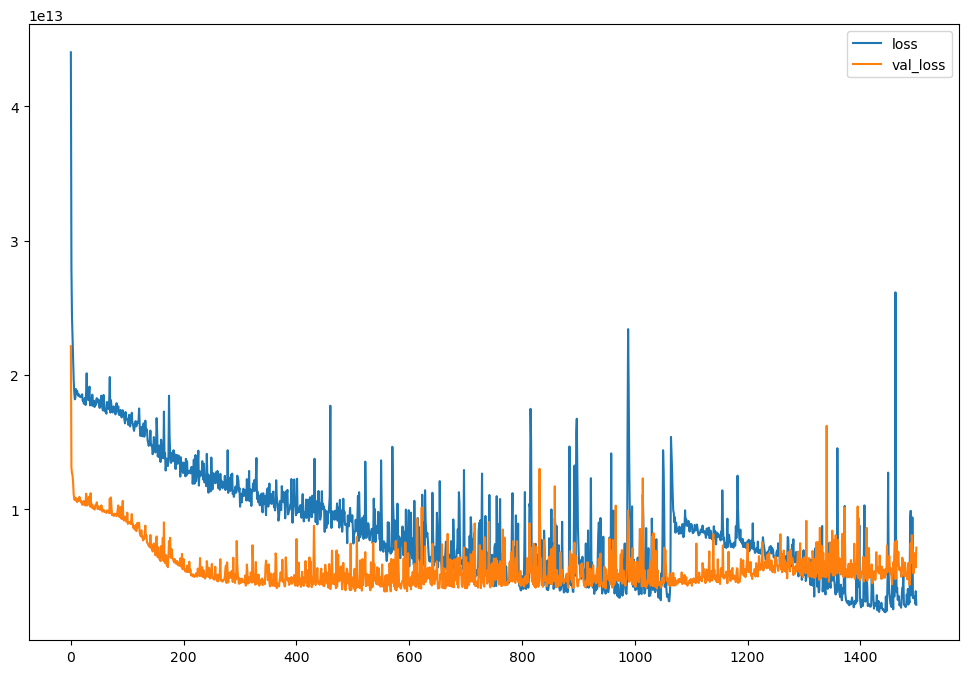

In [366]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

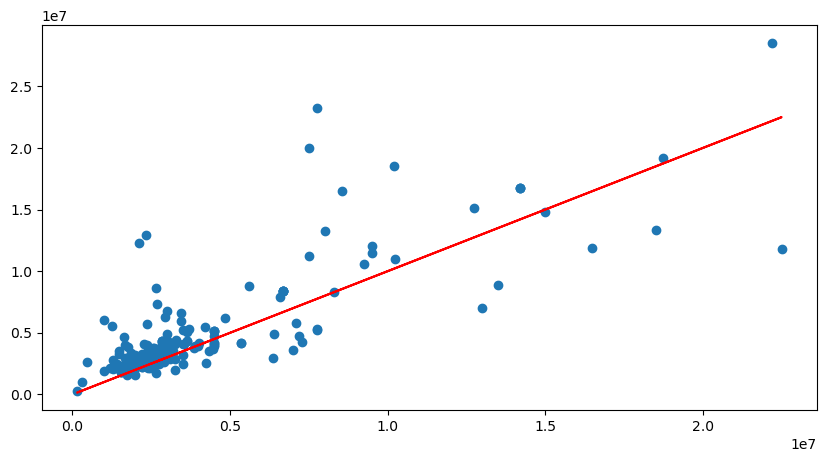

In [367]:
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,"r")